# **Data Cleaning**

## **Loading in Data from Data-Gathering Notebook**

Let's load in the data we gathered from the data-gathering notebook.

In [87]:
import pandas as pd
import json
import tqdm


fda_df = pd.read_csv('../data-gathering/outputs/fda.csv')
sec_df = pd.read_csv('../data-gathering/outputs/sec.csv')

## **Combinining FDA and SEC data**

First, let's take another look at each of our dataframes.

#### **FDA Dataframe**

In [88]:
fda_df

,third_party_flag,city,advisory_committee_description,address_1,address_2,statement_or_summary,product_code,zip_code,applicant,decision_date,...,review_advisory_committee,postal_code,decision_description,clearance_type,openfda.registration_number,openfda.fei_number,openfda.device_name,openfda.medical_specialty_description,openfda.regulation_number,openfda.device_class
0,N,CHATSWORTH,Unknown,9530 DESOTO AVE.,NaN,NaN,NaN,91311,"DEVON INDUSTRIES, INC.",1987-04-10,...,SU,91311,Unknown,Traditional,NaN,NaN,NaN,NaN,NaN,NaN
1,N,BRONX,"General, Plastic Surgery",3830 BOSTON RD.,NaN,NaN,LRO,10475,"FRAASS SURVIVAL SYSTEMS, INC.",1987-07-09,...,SU,10475,Substantially Equivalent,Traditional,"['2320762', '1823410', '3011389083', '8022032'...","['1823410', '3011389083', '2936485', '30132984...",General Surgery Tray,"General, Plastic Surgery",878.4370,2
2,N,WILMINGTON,Anesthesiology,42 INDUSTRIAL WAY,NaN,NaN,BYD,01887,"PORTEX, INC.",1988-01-19,...,AN,01887,Substantially Equivalent,Traditional,"['3003902312', '3006534321', '8010485', '30060...","['3003902312', '3006534321', '3006061749', '30...","Condenser, Heat And Moisture (Artificial Nose)",Anesthesiology,868.5375,1
3,N,ST. LOUIS,"General, Plastic Surgery",P.O. BOX 466,NaN,Summary,KKX,63166,ANGELICA UNIFORM,1995-01-02,...,HO,63166,Substantially Equivalent,Traditional,"['2320762', '3007886583', '3006787036', '10323...","['3007886583', '3006787036', '1032347', '30041...","Drape, Surgical","General, Plastic Surgery",878.4370,2
4,N,BURLINGTON,Cardiovascular,32 SECOND AVE.,NaN,Statement,MKJ,01803,ZOLL MEDICAL CORP.,1993-10-07,...,CV,01803,Substantially Equivalent,Traditional,"['1219103', '3002714378', '3013153405', '30126...","['3002714378', '3013153405', '6736', '30126361...",Automated External Defibrillators (Non-Wearable),Cardiovascular,870.5310,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166589,N,OCEAN,Hematology,3505 SUNSET AVE.,NaN,Statement,KHE,07712,"IMMUNOSTICS, INC.",2006-06-06,...,HE,07712,Substantially Equivalent,Traditional,"['3005174594', '2050010', '1226769', '2250030'...","['3005174594', '2050010', '1000520007', '22500...","Reagent, Occult Blood",Hematology,864.6550,2
166590,N,AUCKLAND,"Ear, Nose, Throat",P.O. BOX 10075,DOMINION ROAD,Statement,ETD,NaN,ADEPT MEDICAL LTD,2006-07-12,...,EN,NaN,Substantially Equivalent,Traditional,"['3010487482', '2951238', '1519132', '1037007'...","['3010487482', '1519132', '1037007', '1048735'...","Tube, Tympanostomy","Ear, Nose, Throat",874.3880,2
166591,N,MCGAW PARK,"Gastroenterology, Urology",1620 WAUKEGAN ROAD,MPGR-AL,Summary,KDI,60085,BAXTER HEALTHCARE CORPORATION,2006-10-19,...,GU,60085,Substantially Equivalent,Traditional,"['8041145', '3000247873', '2521402', '30142727...","['3002974635', '3000247873', '2521402', '30142...","Dialyzer, High Permeability With Or Without Se...","Gastroenterology, Urology",876.5860,2
166592,N,HSIN-CHU CIY,Physical Medicine,"NO 58, FU-CHIUN ST",NaN,Summary,IPF,30067,"KINGLY STAR INTL. TECHNOLOGY CO., LTD.",2007-04-17,...,PM,30067,Substantially Equivalent,Traditional,"['3007743972', '3011501130', '3019892999', '30...","['3007743972', '3011501130', '3019892999', '30...","Stimulator, Muscle, Powered",Physical Medicine,890.5850,2


#### **SEC Dataframe**

In [89]:
sec_df

,CIK,SEC_name
0,743870,RANCON REALTY FUND IV
1,815097,Carnival Corporation
2,1466739,NEXT GALAXY CORP.
3,1841661,AF ACQUISITION CORP.
4,1831099,NaN
...,...,...
17340,899749,HEALTHCARE REALTY TRUST INCORPORATED
17341,1524083,CHATCHING INC.
17342,1381668,TFS FINANCIAL CORPORATION
17343,1354772,NORTHEAST COMMUNITY BANCORP INC


### **Matching Names**
the `applicant` column in the df_510k dataframe contains the names of the companies that s

In [90]:
## filter fda_df for companies that are in the SEC dataframe and combining
matches_df = fda_df[fda_df["applicant"].isin(sec_df["SEC_name"])]                 # filter fda_df  
matches_df = matches_df.merge(sec_df, left_on="applicant", right_on="SEC_name")     # merge the two dataframes

In [91]:
matches_df

,third_party_flag,city,advisory_committee_description,address_1,address_2,statement_or_summary,product_code,zip_code,applicant,decision_date,...,decision_description,clearance_type,openfda.registration_number,openfda.fei_number,openfda.device_name,openfda.medical_specialty_description,openfda.regulation_number,openfda.device_class,CIK,SEC_name
0,N,PHOENIXVILLE,Orthopedic,303 SCHELL LANE,NaN,Summary,MQP,19460,"GLOBUS MEDICAL, INC.",2004-03-23,...,Substantially Equivalent,Special,"['3003761012', '3010032903', '9617544', '30099...","['3003761012', '3010032903', '3009941480', '30...",Spinal Vertebral Body Replacement Device,Orthopedic,888.3060,2,1237831,"GLOBUS MEDICAL, INC."
1,N,PHOENIXVILLE,Orthopedic,303 SCHELL LANE,NaN,Summary,KWQ,19460,"GLOBUS MEDICAL, INC.",2004-06-17,...,Substantially Equivalent,Traditional,"['9617544', '3009888740', '3005677016', '30112...","['3009888740', '3003018882', '3010938185', '30...","Appliance, Fixation, Spinal Intervertebral Body",Orthopedic,888.3060,2,1237831,"GLOBUS MEDICAL, INC."
2,N,AUDUBON,Orthopedic,2560 GENERAL ARMISTEAD AVE.,VALLEY FORGE BUSINESS CENTER,Summary,KWQ,19403,"GLOBUS MEDICAL, INC.",2009-08-13,...,Substantially Equivalent,Special,"['9617544', '3009888740', '3005677016', '30112...","['3009888740', '3003018882', '3010938185', '30...","Appliance, Fixation, Spinal Intervertebral Body",Orthopedic,888.3060,2,1237831,"GLOBUS MEDICAL, INC."
3,N,AUDUBON,Orthopedic,2560 General Armistead Ave,VALLEY FORGE BUSINESS CENTER,Summary,MQV,19403,"GLOBUS MEDICAL, INC.",2014-08-26,...,Substantially Equivalent,Traditional,"['2030598', '3009595577', '3005581234', '10005...","['3009595577', '3002807305', '1000577893', '30...","Filler, Bone Void, Calcium Compound",Orthopedic,888.3045,2,1237831,"GLOBUS MEDICAL, INC."
4,N,PHOENIXVILLE,Orthopedic,303 SCHELL LANE,NaN,Summary,MNH,19460,"GLOBUS MEDICAL, INC.",2004-05-20,...,Substantially Equivalent,Traditional,"['3009149199', '9617544', '3003697998', '30098...","['3009149199', '3003697998', '3009888740', '30...","Orthosis, Spondylolisthesis Spinal Fixation",Orthopedic,888.3070,2,1237831,"GLOBUS MEDICAL, INC."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2172,N,Suwanee,Obstetrics/Gynecology,3950 Johns Creek CT.,NaN,Summary,MQF,30024,Femasys Inc.,2023-09-22,...,Substantially Equivalent,Traditional,"['1216677', '3014755376', '3005941719', '10184...","['3002807969', '3014755376', '1216677', '30142...","Catheter, Assisted Reproduction",Obstetrics/Gynecology,884.6110,2,1339005,Femasys Inc.
2173,N,San Jose,"General, Plastic Surgery",1800 Bering Drive,NaN,Summary,ONF,95112,Venus Concept Inc.,2023-09-11,...,Substantially Equivalent,Special,"['3007085226', '3017905264', '3016170453', '30...","['3007085226', '3017905264', '3016170453', '30...",Powered Light Based Non-Laser Surgical Instrum...,"General, Plastic Surgery",878.4810,2,1409269,Venus Concept Inc.
2174,N,WARSAW,Orthopedic,56 E BELL DR,NaN,Summary,HRS,46582,BIOMET INC,2016-10-12,...,Substantially Equivalent,Traditional,"['3007441485', '1032347', '3009888740', '30089...","['3007441485', '3003051987', '1032347', '30098...","Plate, Fixation, Bone",Orthopedic,888.3030,2,351346,BIOMET INC
2175,N,North Chicago,"Gastroenterology, Urology",1 N. Waukegan Road,NaN,Summary,KNT,60064,AbbVie Inc.,2015-01-14,...,Unknown,Traditional,"['3004194523', '3009247326', '2030598', '30135...","['3003172243', '3004194523', '3009247326', '30...","Tubes, Gastrointestinal (And Accessories)","Gastroenterology, Urology",876.5980,2,1551152,AbbVie Inc.


### **Pulling Financial Data from SEC JSON Files**

Great, now we have a dataframe that contains all of the 510k data and the matching SEC CIK numbers. Now we can begin the process of pulling the financial data from the SEC JSONs in companyfacts folder. Let's start off by getting the CIK numbers from the dataframe.

In [92]:
# Getting unique list of CIKs in the matches_df

cik_list = matches_df["CIK"].unique().tolist()

#Printing # of unique companies

print("# of companies:", len(cik_list))

# of companies: 124


Now that I have my list of unique CIK numbers, I can begin the process of pulling the financial data from the SEC JSONs. I'll use a series of nested for loops that will pull the financial data from the JSONs and add a dictionary of each row to a list, which I will then turn into a Pandas DataFrame.

I'm seeking to pull the following data from the JSONs:

- `GrossProfit`: This is the total amount of money made from sales after subtracting the cost of goods sold
- `CostsAndExpenses`: This is the total amount of money spent on costs and expenses. This includes the cost of goods sold, as well as SG&A expenses 
- `SellingGeneralAndAdministrativeExpense`: This is the total amount of money spent on selling, general, and administrative expenses, which includes R&D (Research and Development)
- `ProfitLoss`: This is the net income of the company

From these four data points, I can likely calculate a variety of other relevant financial metrics, but I'm not an accountant, so I'll do some reading and get back to that later.



In [93]:
import glob

target_metrics = ["RevenueFromContractWithCustomerExcludingAssessedTax",
                  "Revenues",
                  "SalesRevenueNet",
                  "CostOfGoodsAndServicesSold",
                  "GrossProfit",
                  "OperatingExpenses",
                  "ResearchAndDevelopmentExpense",
                  "SellingGeneralAndAdministrativeExpense",
                  "OperatingIncomeLoss",
                  "NetIncomeLoss"]
                # "EarningsPerShareBasic"
                
gathered_metrics = []

for cik in tqdm.tqdm(cik_list):
    try:
        file_name = glob.glob('/Users/dsan/My Drive/5000-Project/Data/Raw-data/SEC/companyfacts/*' + str(cik) + '.json')[0]
        with open(file_name, 'r') as f:
            data = json.load(f)
            for metric in target_metrics:
                try:
                    all_years = data["facts"]["us-gaap"][metric]["units"]["USD"]
                    for year in all_years:
                        row = {}
                        row["CIK"] = cik
                        row["metric"] = metric
                        row["financial_year"] = year["fy"]
                        row["financial_period"] = year["fp"]
                        row["start_date"] = year["start"]
                        row["end_date"] = year["end"]
                        row["filing_date"] = year["filed"]
                        row["amount"] = year["val"]
                        row["form"] = year["form"]
                        gathered_metrics.append(row)

                    all_years_eps = data["facts"]["us-gaap"]["EarningsPerShareBasic"]["units"]["USD/shares"]
                    for year in all_years_eps:
                        row = {}
                        row["CIK"] = cik
                        row["metric"] = "EarningsPerShareBasic"
                        row["financial_year"] = year["fy"]
                        row["financial_period"] = year["fp"]
                        row["start_date"] = year["start"]
                        row["end_date"] = year["end"]
                        row["filing_date"] = year["filed"]
                        row["amount"] = year["val"]
                        row["form"] = year["form"]
                        gathered_metrics.append(row)

                except:
                    continue
    except:
        continue

financials_df = pd.DataFrame(gathered_metrics)
print("# of companies with at least partial data pull:", financials_df.CIK.nunique())

100%|██████████| 124/124 [00:03<00:00, 39.50it/s]


# of companies with at least partial data pull: 120


### **Cleaning Financial Data Pull**

Let's take a look at the financial data we've pulled from the SEC JSONs to see if we need to clean it up at all.

In [94]:
financials_df

,CIK,metric,financial_year,financial_period,start_date,end_date,filing_date,amount,form
0,1237831,Revenues,2018.0,FY,2016-01-01,2016-12-31,2019-02-21,5.639940e+08,10-K
1,1237831,Revenues,2018.0,FY,2017-01-01,2017-03-31,2019-02-21,1.558090e+08,10-K
2,1237831,Revenues,2018.0,Q2,2017-01-01,2017-06-30,2018-08-02,3.081990e+08,10-Q
3,1237831,Revenues,2018.0,Q2,2017-04-01,2017-06-30,2018-08-02,1.523900e+08,10-Q
4,1237831,Revenues,2018.0,FY,2017-04-01,2017-06-30,2019-02-21,1.523900e+08,10-K
...,...,...,...,...,...,...,...,...,...
191643,1397702,EarningsPerShareBasic,2022.0,Q3,2022-07-01,2022-09-30,2022-11-09,-2.900000e-01,10-Q
191644,1397702,EarningsPerShareBasic,2022.0,FY,2022-01-01,2022-12-31,2023-02-28,-1.540000e+00,10-K
191645,1397702,EarningsPerShareBasic,2023.0,Q1,2023-01-01,2023-03-31,2023-05-09,-4.300000e-01,10-Q
191646,1397702,EarningsPerShareBasic,2023.0,Q2,2023-01-01,2023-06-30,2023-08-08,-7.700000e-01,10-Q


It looks like we've pulled multiple of the same metric for a single financial year. I've done some research into this, and it can be hard to determine which is the correct figure. In the spirit of minimizing the total data loss, I'm going to take the maximum of the absolute value of figures for the same Full-Year period. This should give us the most conservative loss of the financial data.

In [95]:
# filtering for only full years
financials_df = financials_df[financials_df["financial_period"] == "FY"]

# Group by CIK, Metric, Financial Year and take max of absolute value of abs_amount
correct_indicies = financials_df.groupby(["CIK", "metric", "financial_year"])["amount"].apply(lambda x: x.abs().idxmax()).reset_index()
financials_df = financials_df.loc[correct_indicies["amount"]]
financials_df

,CIK,metric,financial_year,financial_period,start_date,end_date,filing_date,amount,form
6743,1800,EarningsPerShareBasic,2022.0,FY,2022-01-01,2022-12-31,2023-03-23,-1.08,10-K
6829,1800,NetIncomeLoss,2021.0,FY,2021-01-05,2021-12-31,2022-03-30,-1954091.00,10-K
6843,1800,NetIncomeLoss,2022.0,FY,2022-01-01,2022-12-31,2023-03-23,-52726000.00,10-K
6781,1800,OperatingIncomeLoss,2021.0,FY,2021-01-05,2021-12-31,2022-03-30,-1917009.00,10-K
6790,1800,OperatingIncomeLoss,2022.0,FY,2022-01-01,2022-12-31,2023-03-23,-40088000.00,10-K
...,...,...,...,...,...,...,...,...,...
134877,1835567,ResearchAndDevelopmentExpense,2022.0,FY,2022-01-01,2022-12-31,2023-03-31,48311000.00,10-K
134836,1835567,RevenueFromContractWithCustomerExcludingAssess...,2021.0,FY,2020-01-01,2020-12-31,2022-03-29,9384000.00,10-K
134849,1835567,RevenueFromContractWithCustomerExcludingAssess...,2022.0,FY,2022-01-01,2022-12-31,2023-03-31,12694000.00,10-K
134898,1835567,SellingGeneralAndAdministrativeExpense,2021.0,FY,2021-01-01,2021-12-31,2022-03-29,67619000.00,10-K


### **Pivoting Data**

Now, I am going to pivot the data into a format that will be easier to work with. I'll pivot the data so that each row is a CIK, and each column is a financial metric for a given Financial Year. This will allow me to easily merge the financial metrics of each company into the FDA Dataframe.

In [96]:
transform_list = []

target_metrics = ["RevenueFromContractWithCustomerExcludingAssessedTax",
                  "Revenues",
                  "SalesRevenueNet",
                  "CostOfGoodsAndServicesSold",
                  "GrossProfit",
                  "OperatingExpenses",
                  "ResearchAndDevelopmentExpense",
                  "SellingGeneralAndAdministrativeExpense",
                  "OperatingIncomeLoss",
                  "NetIncomeLoss",
                  "EarningsPerShareBasic"]

for year in financials_df["financial_year"].unique():
    for cik in financials_df["CIK"].unique():
        row = {}
        row["CIK"] = cik
        row["financial_year"] = year
        for metric in target_metrics:
            try:
                row_metric =financials_df.loc[(financials_df["financial_year"] == year) & (financials_df["CIK"] == cik) & (financials_df["metric"] == metric), "amount"].values[0]
                row[metric] = row_metric
            except:
                row[metric] = pd.NA
        transform_list.append(row)

transformed_df = pd.DataFrame(transform_list)
transformed_df

,CIK,financial_year,RevenueFromContractWithCustomerExcludingAssessedTax,Revenues,SalesRevenueNet,CostOfGoodsAndServicesSold,GrossProfit,OperatingExpenses,ResearchAndDevelopmentExpense,SellingGeneralAndAdministrativeExpense,OperatingIncomeLoss,NetIncomeLoss,EarningsPerShareBasic
0,1800,2022.0,<NA>,101348000.0,<NA>,<NA>,<NA>,<NA>,5361000.0,<NA>,-40088000.0,-52726000.0,-1.08
1,8818,2022.0,596350000.0,<NA>,<NA>,295404000.0,300946000.0,294288000.0,83295000.0,209661000.0,12817000.0,9515000.0,0.14
2,8868,2022.0,3431200000.0,3625200000.0,<NA>,<NA>,<NA>,<NA>,40800000.0,2152900000.0,-178600000.0,-428100000.0,<NA>
3,10795,2022.0,<NA>,19131000000.0,<NA>,10500000000.0,<NA>,<NA>,1279000000.0,4719000000.0,2282000000.0,2092000000.0,6.92
4,12208,2022.0,2922500000.0,<NA>,<NA>,1284449000.0,1638096000.0,<NA>,260638000.0,877122000.0,500336000.0,4254257000.0,142.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,1719395,2020.0,69154000.0,<NA>,<NA>,21873000.0,47281000.0,82152000.0,12841000.0,<NA>,-44036000.0,-44486000.0,<NA>
1766,1742692,2020.0,<NA>,206107000.0,<NA>,<NA>,175258000.0,102417000.0,9467000.0,<NA>,72841000.0,75030000.0,2.09
1767,1804176,2020.0,<NA>,<NA>,<NA>,<NA>,<NA>,3774125.0,<NA>,<NA>,-3774125.0,-132204768.0,<NA>
1768,1833769,2020.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


### **Merging Back into FDA Dataframe**

Now that I have the financials in the right form, it's time to merge back into the FDA dataframe. I'll do this by merging on the `CIK` columns and match the `fiancial_year` of the Financial Dataframe column with the `decision_year` of the FDA dataframe to ensure the right merging.

In [97]:
matches_df["decision_year"] = matches_df["decision_date"].str[:4].astype(int)
matches_df = matches_df.merge(transformed_df, left_on=["CIK","decision_year"], right_on=["CIK","financial_year"])

## **Dataframe Refinement**

Now that we have all the data we need, it's time to trim the dataframe down to only the columns we need. I'll also rename the columns to make them easier to work with. Then, I'm going to pass it into R and start dealing with null values in there.

In [98]:
matches_df.info()
analytical_df = matches_df.drop(columns=["third_party_flag","city","address_1","address_2","applicant","decision_date", "contact", "decision_year", "openfda.registration_number",
                                         "openfda.fei_number", "openfda.device_name", "openfda.medical_specialty_description", "openfda.regulation_number", "openfda.device_class"])
analytical_df.info()
analytical_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 44 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   third_party_flag                                     753 non-null    object 
 1   city                                                 753 non-null    object 
 2   advisory_committee_description                       753 non-null    object 
 3   address_1                                            753 non-null    object 
 4   address_2                                            92 non-null     object 
 5   statement_or_summary                                 744 non-null    object 
 6   product_code                                         753 non-null    object 
 7   zip_code                                             752 non-null    object 
 8   applicant                                            753 non-null    o

,advisory_committee_description,statement_or_summary,product_code,zip_code,decision_code,country_code,device_name,advisory_committee,expedited_review_flag,k_number,...,Revenues,SalesRevenueNet,CostOfGoodsAndServicesSold,GrossProfit,OperatingExpenses,ResearchAndDevelopmentExpense,SellingGeneralAndAdministrativeExpense,OperatingIncomeLoss,NetIncomeLoss,EarningsPerShareBasic
0,Orthopedic,Summary,KWQ,19403,SESE,US,TRUSS THORACOLUMBAR PLATE SYSTEM,OR,NaN,K092108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Unknown,Summary,MRW,19403,SESE,US,ZYFUSE FACET FIXATION SYSTEM,NaN,NaN,K090952,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Orthopedic,Summary,KWQ,19403,SESE,US,XTEND ANTERIOR CERVICAL PLATE SYSTEM,OR,NaN,K092146,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Orthopedic,Summary,NKB,19403,SESE,US,MODIFICATION TO BEACON STABILIZATION SYSTEM,OR,NaN,K092610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Unknown,Summary,MRW,19403,SESE,US,CORRIDOR FIXATION SYSTEM,NaN,NaN,K083442,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,Obstetrics/Gynecology,Summary,MQF,30024,SESE,US,FemaSeed Intratubal Insemination,OB,NaN,K231730,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
749,"General, Plastic Surgery",Summary,ONF,95112,SESE,US,Venus Versa PRO System,SU,NaN,K232192,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
750,Orthopedic,Summary,HRS,46582,SESE,US,Ulna Plating System,OR,NaN,K162424,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
751,"Gastroenterology, Urology",Summary,KNT,60064,SESK,US,AbbVie PEG,GU,NaN,K142793,...,<NA>,22859000000.0,<NA>,4925000000.0,<NA>,<NA>,7724000000.0,7537000000.0,<NA>,3.15


### **Visualizing Nulls in Python**

<Axes: >

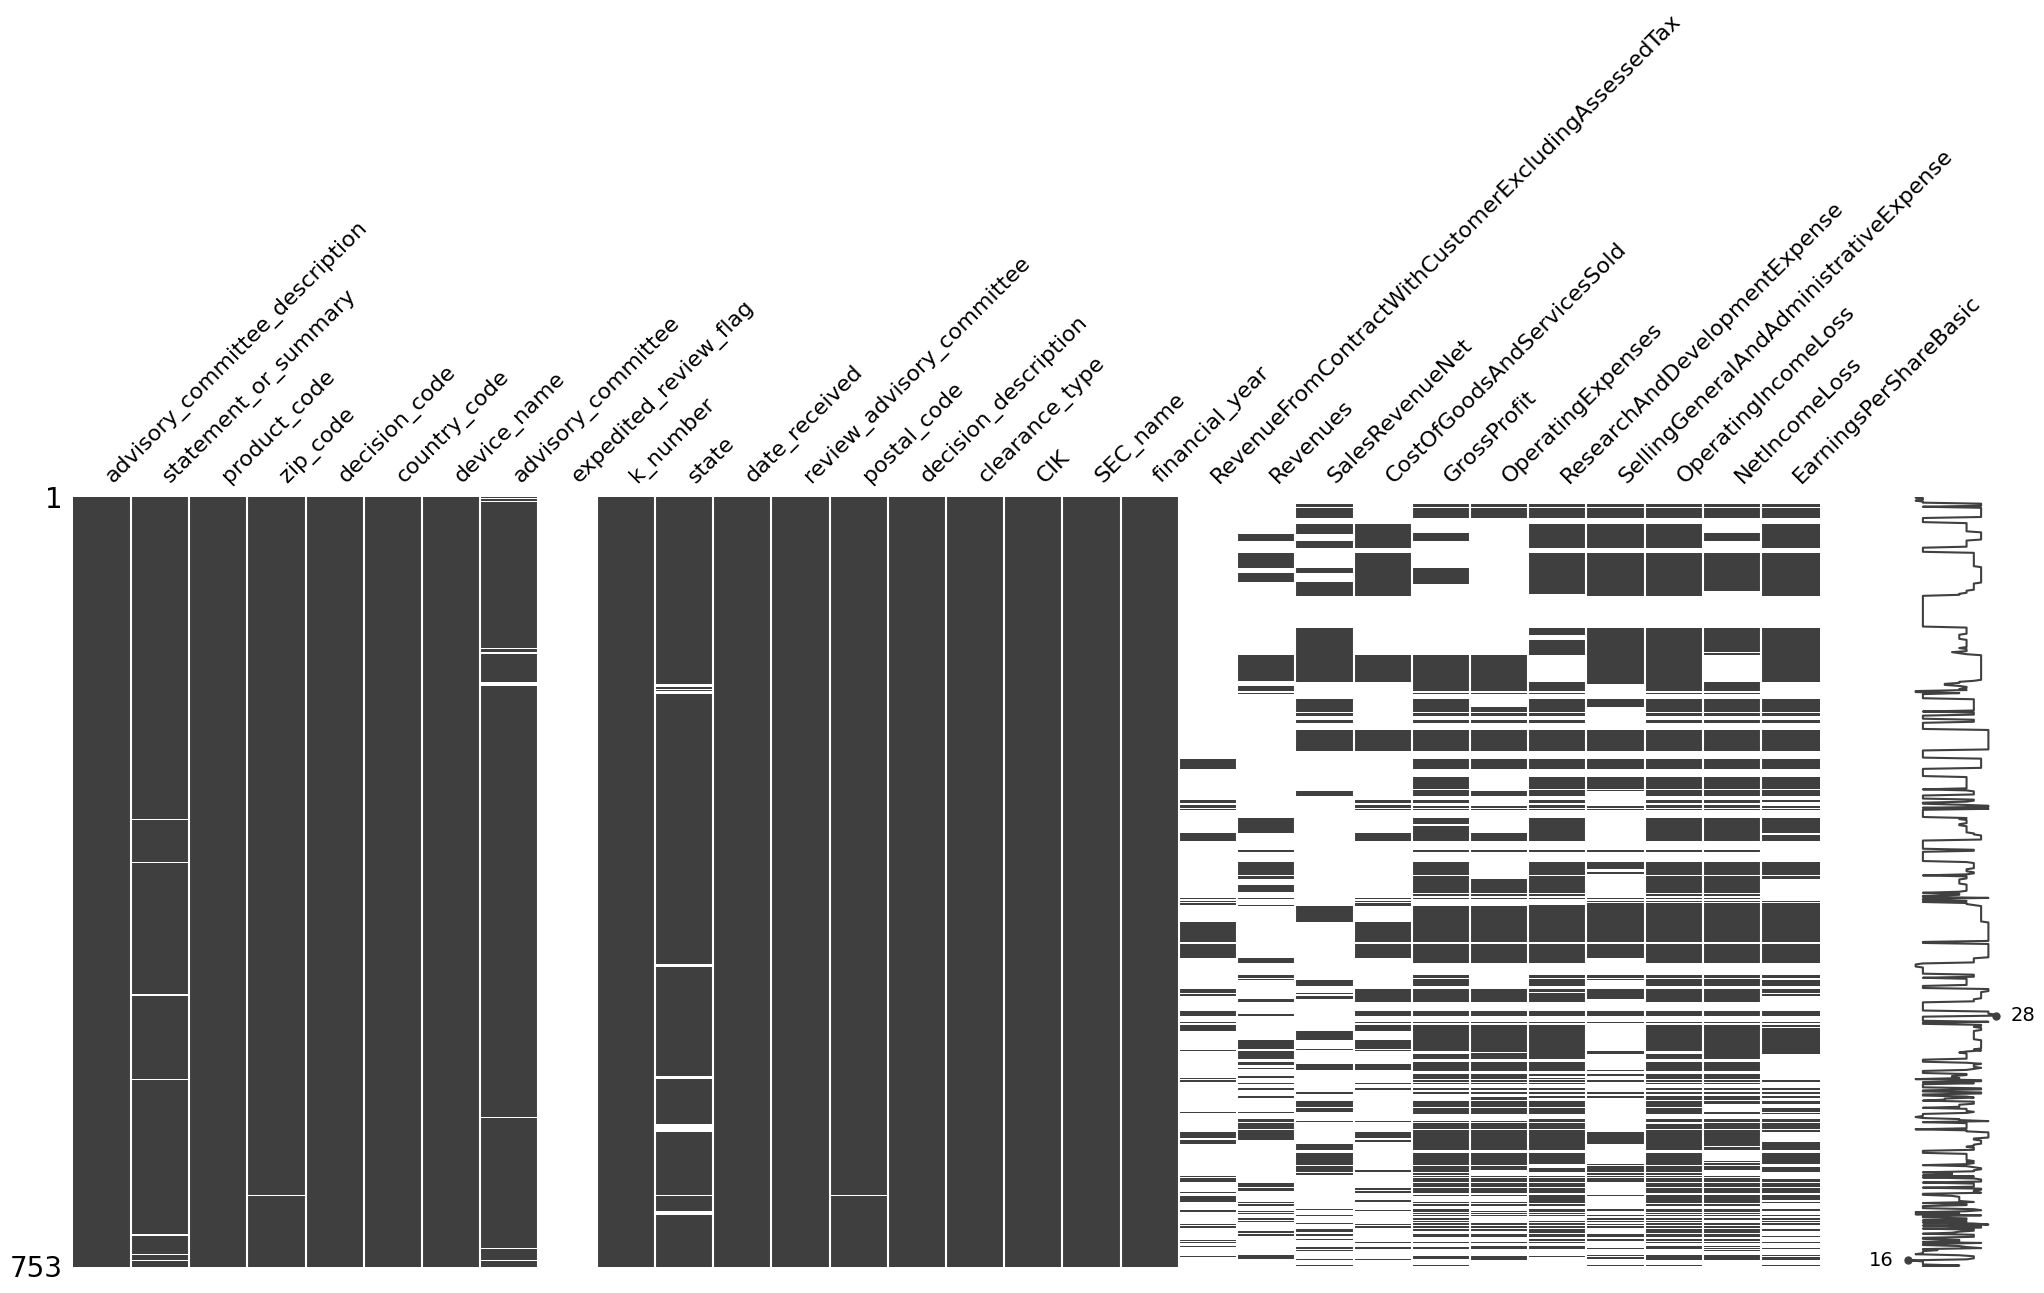

In [99]:
import missingno as msno

msno.matrix(analytical_df)

In [100]:
df_analysis = analytical_df[['device_name',
                              'SEC_name',
                                  'state',
                                  'CIK', 
                                  'financial_year', 
                                  'advisory_committee_description', 
                                  'clearance_type',
                                  "RevenueFromContractWithCustomerExcludingAssessedTax",
                                  "Revenues",
                                  "SalesRevenueNet",
                                  "CostOfGoodsAndServicesSold",
                                  "GrossProfit",
                                  "OperatingExpenses",
                                  "ResearchAndDevelopmentExpense",
                                  "SellingGeneralAndAdministrativeExpense",
                                  "OperatingIncomeLoss",
                                  "NetIncomeLoss",
                                  "EarningsPerShareBasic"]]


df_analysis.to_csv('./outputs/intermediary.csv', index=False)


<Axes: >

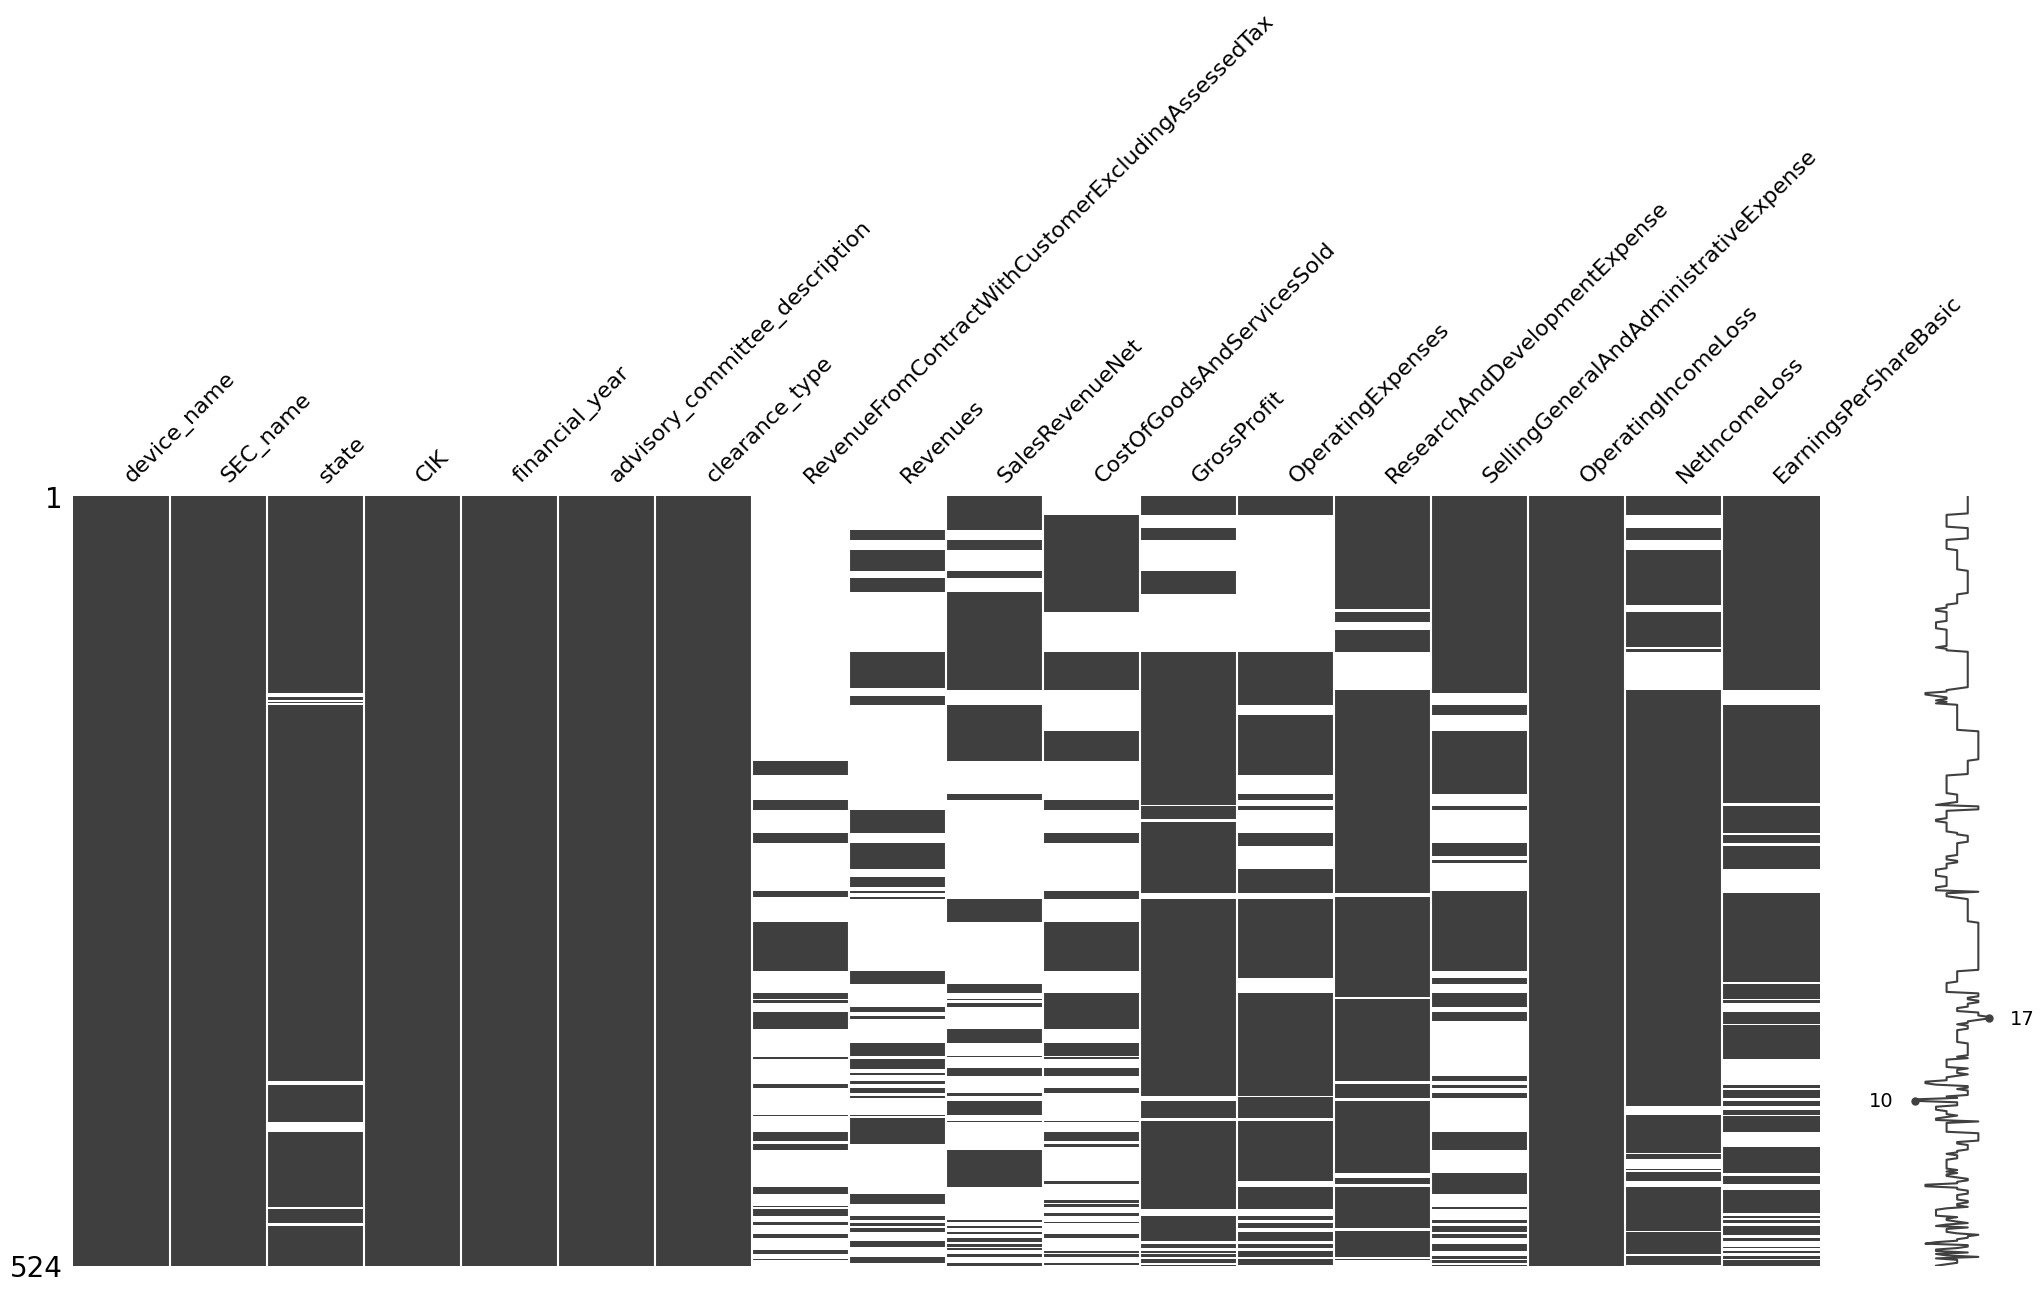

In [101]:
msno.matrix(df_analysis.dropna(subset=['OperatingIncomeLoss']))

# **Imputation**

## **OPEX = R&D + SG&A**

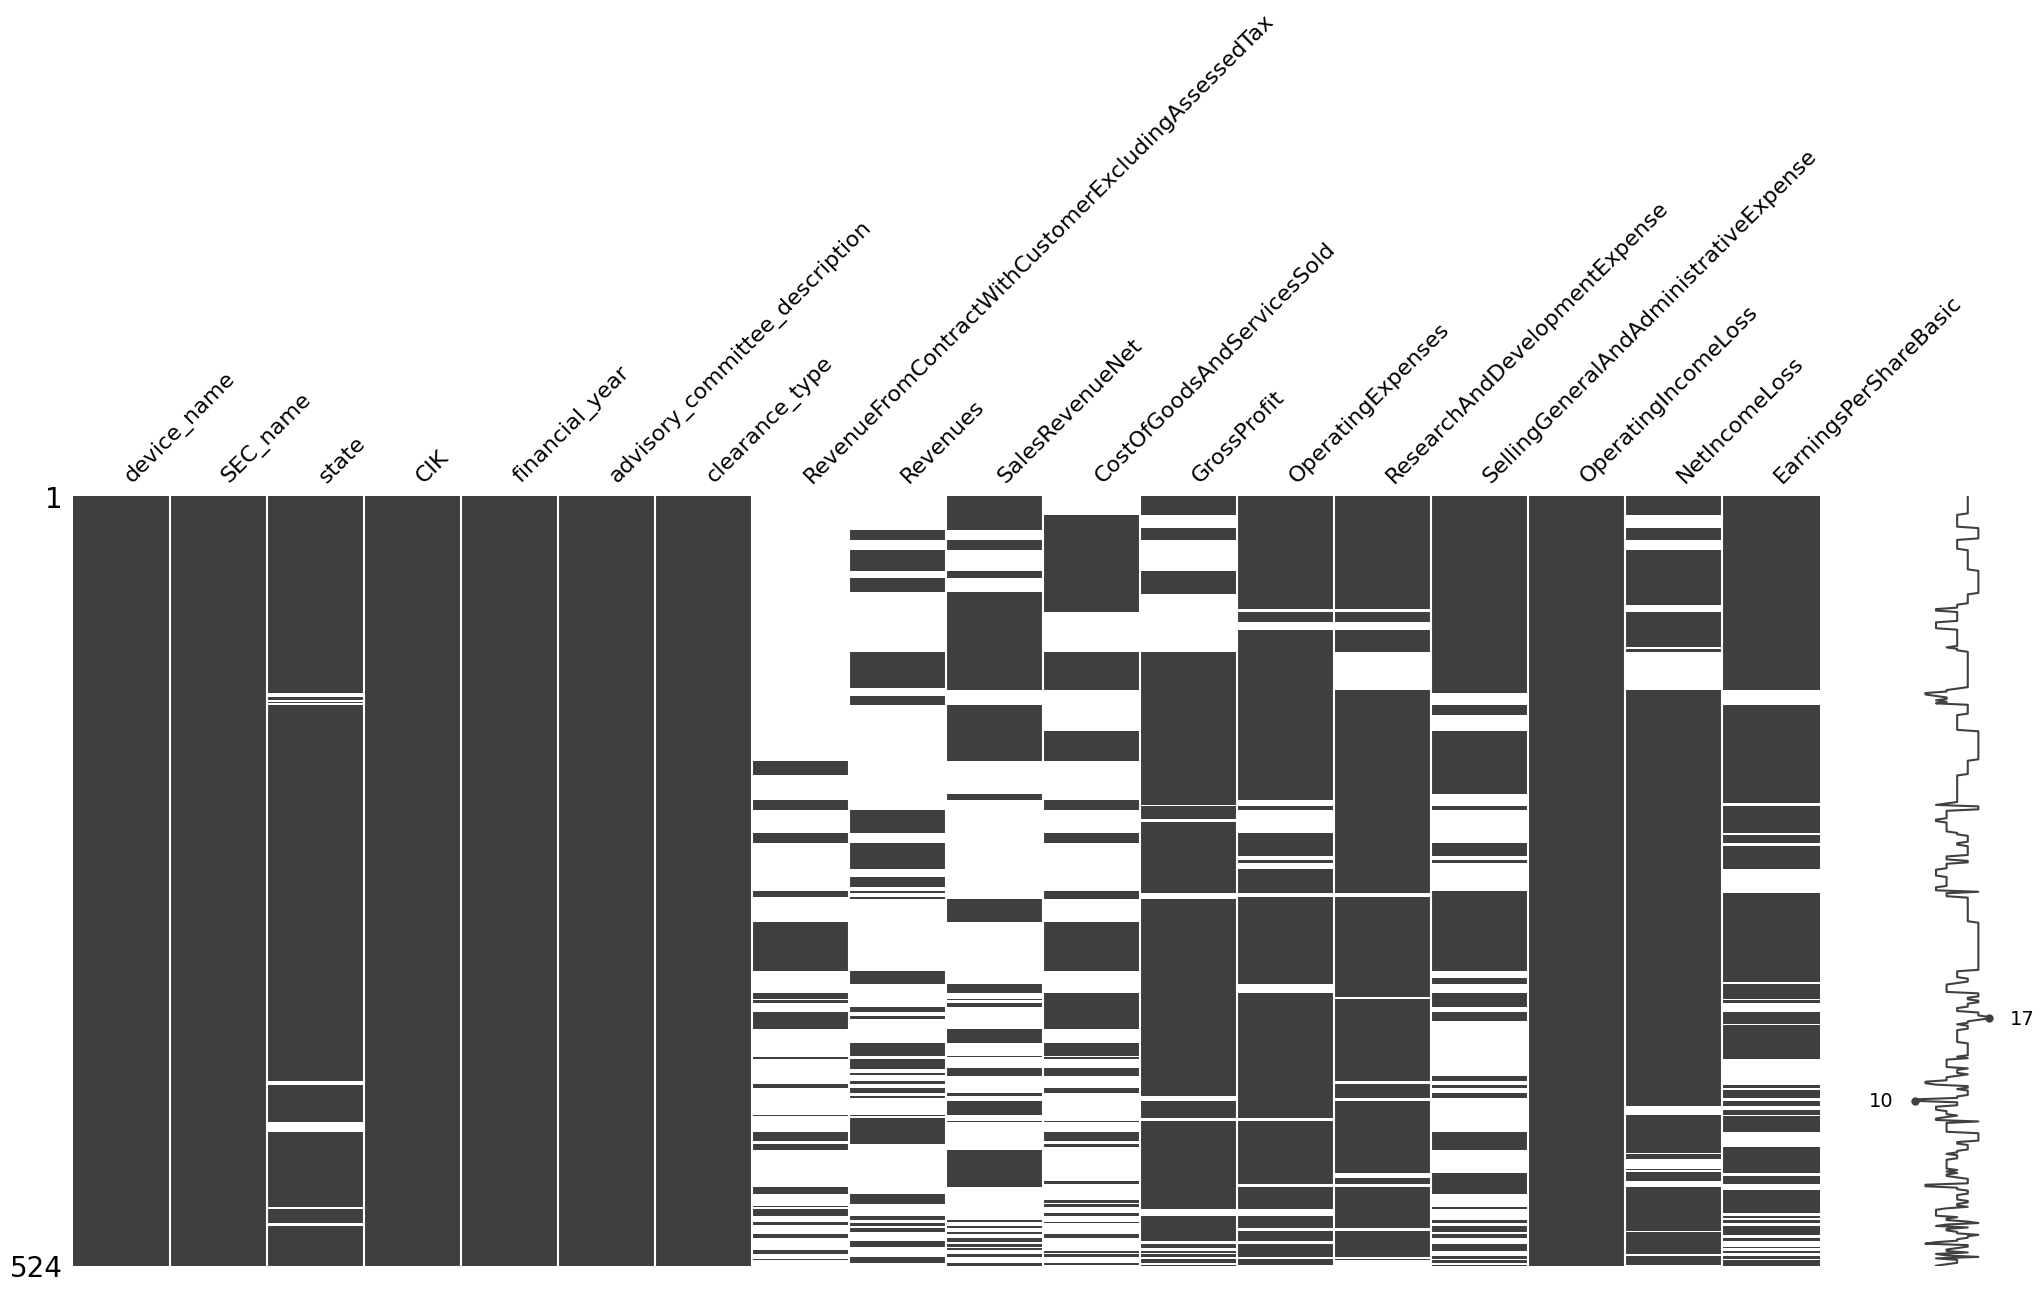

In [102]:
condition = df_analysis['ResearchAndDevelopmentExpense'].notnull() & df_analysis['SellingGeneralAndAdministrativeExpense'].notnull()

df_analysis.loc[condition, 'OperatingExpenses'] = df_analysis.loc[condition, 'OperatingExpenses'].fillna(
    df_analysis['ResearchAndDevelopmentExpense'] + df_analysis['SellingGeneralAndAdministrativeExpense'])

msno.matrix(df_analysis.dropna(subset=['OperatingIncomeLoss']))

df_analysis = df_analysis.dropna(subset=['OperatingIncomeLoss'])

## **Revenues**

<Axes: >

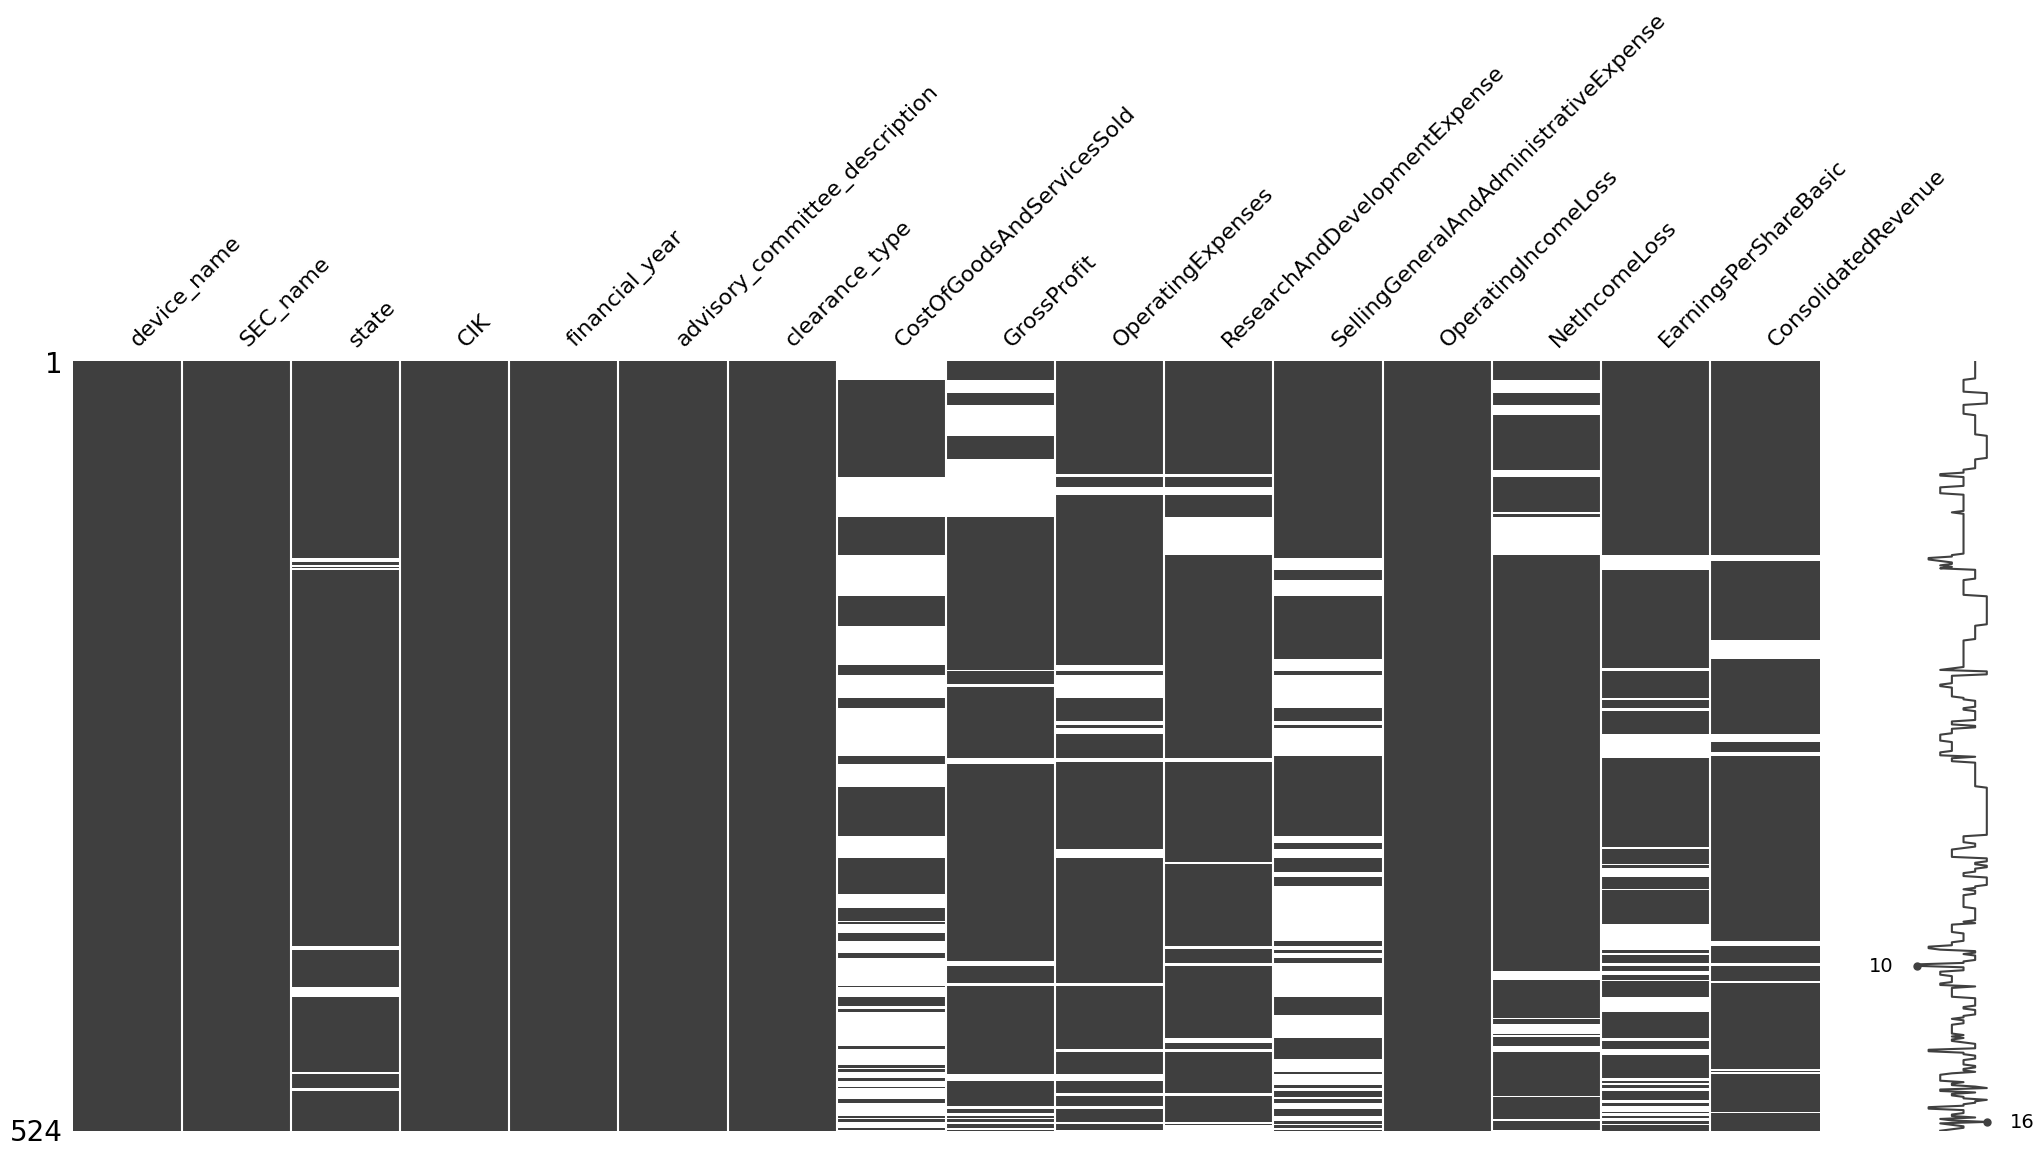

In [103]:
def calculate_average(row):
    values = row[['RevenueFromContractWithCustomerExcludingAssessedTax', 'Revenues', 'SalesRevenueNet']]
    non_null_values = values.dropna()
    if len(non_null_values) > 0:
        return non_null_values.mean()
    else:
        return None

df_analysis['ConsolidatedRevenue'] = df_analysis.apply(calculate_average, axis=1)


## dropping columns that are not needed

df_analysis = df_analysis.drop(columns=["RevenueFromContractWithCustomerExcludingAssessedTax",
                                        "Revenues",
                                        "SalesRevenueNet"])

msno.matrix(df_analysis)

## **Gross Profit = Operating Income + OPEX**

<Axes: >

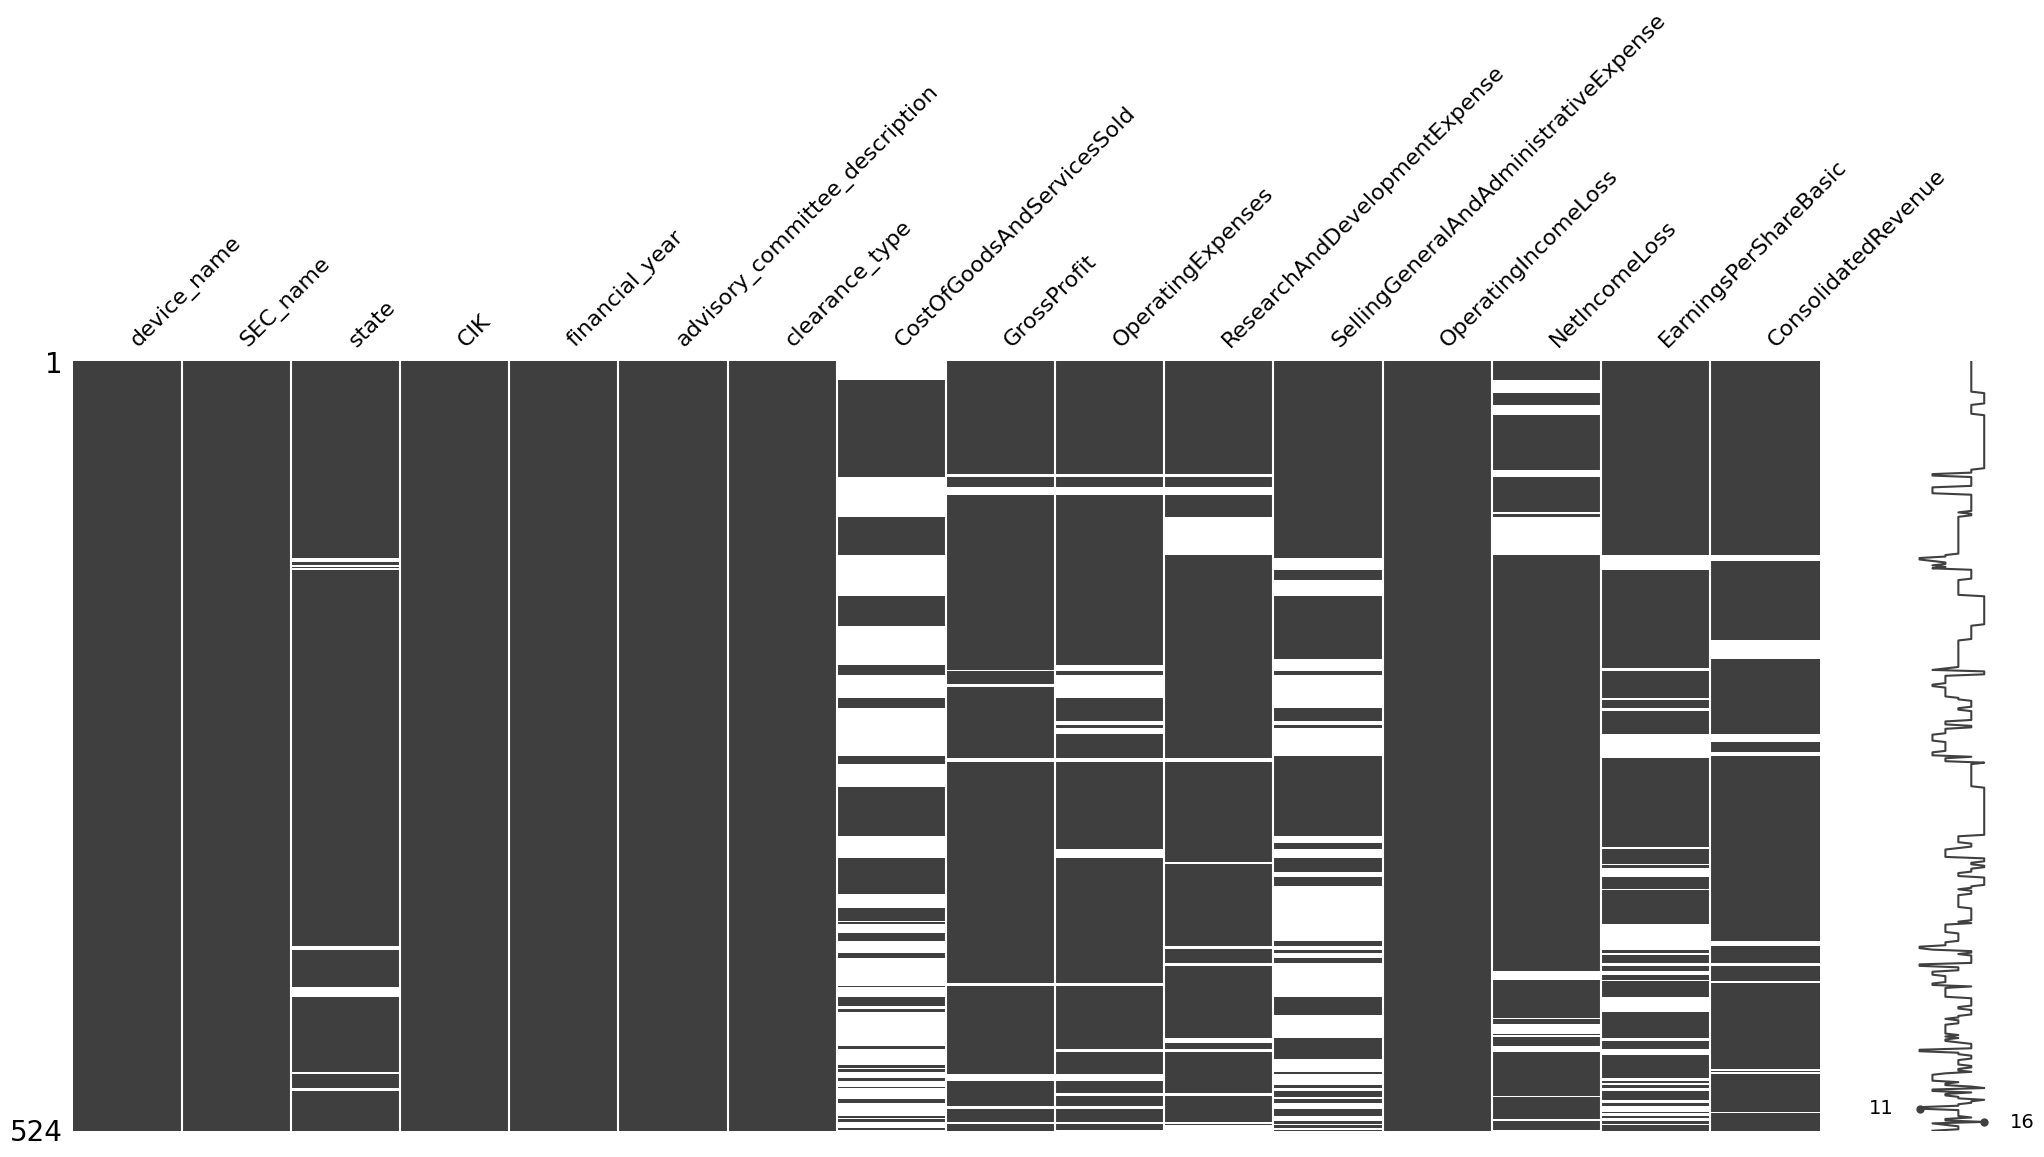

In [104]:
condition = df_analysis['OperatingIncomeLoss'].notnull() & df_analysis['OperatingExpenses'].notnull()

df_analysis.loc[condition, 'GrossProfit'] = df_analysis.loc[condition, 'GrossProfit'].fillna(
    df_analysis['OperatingIncomeLoss'] + df_analysis['OperatingExpenses'])

msno.matrix(df_analysis)

## **COGS = Net Sales (i.e. Revenue) - GrossProfit**

<Axes: >

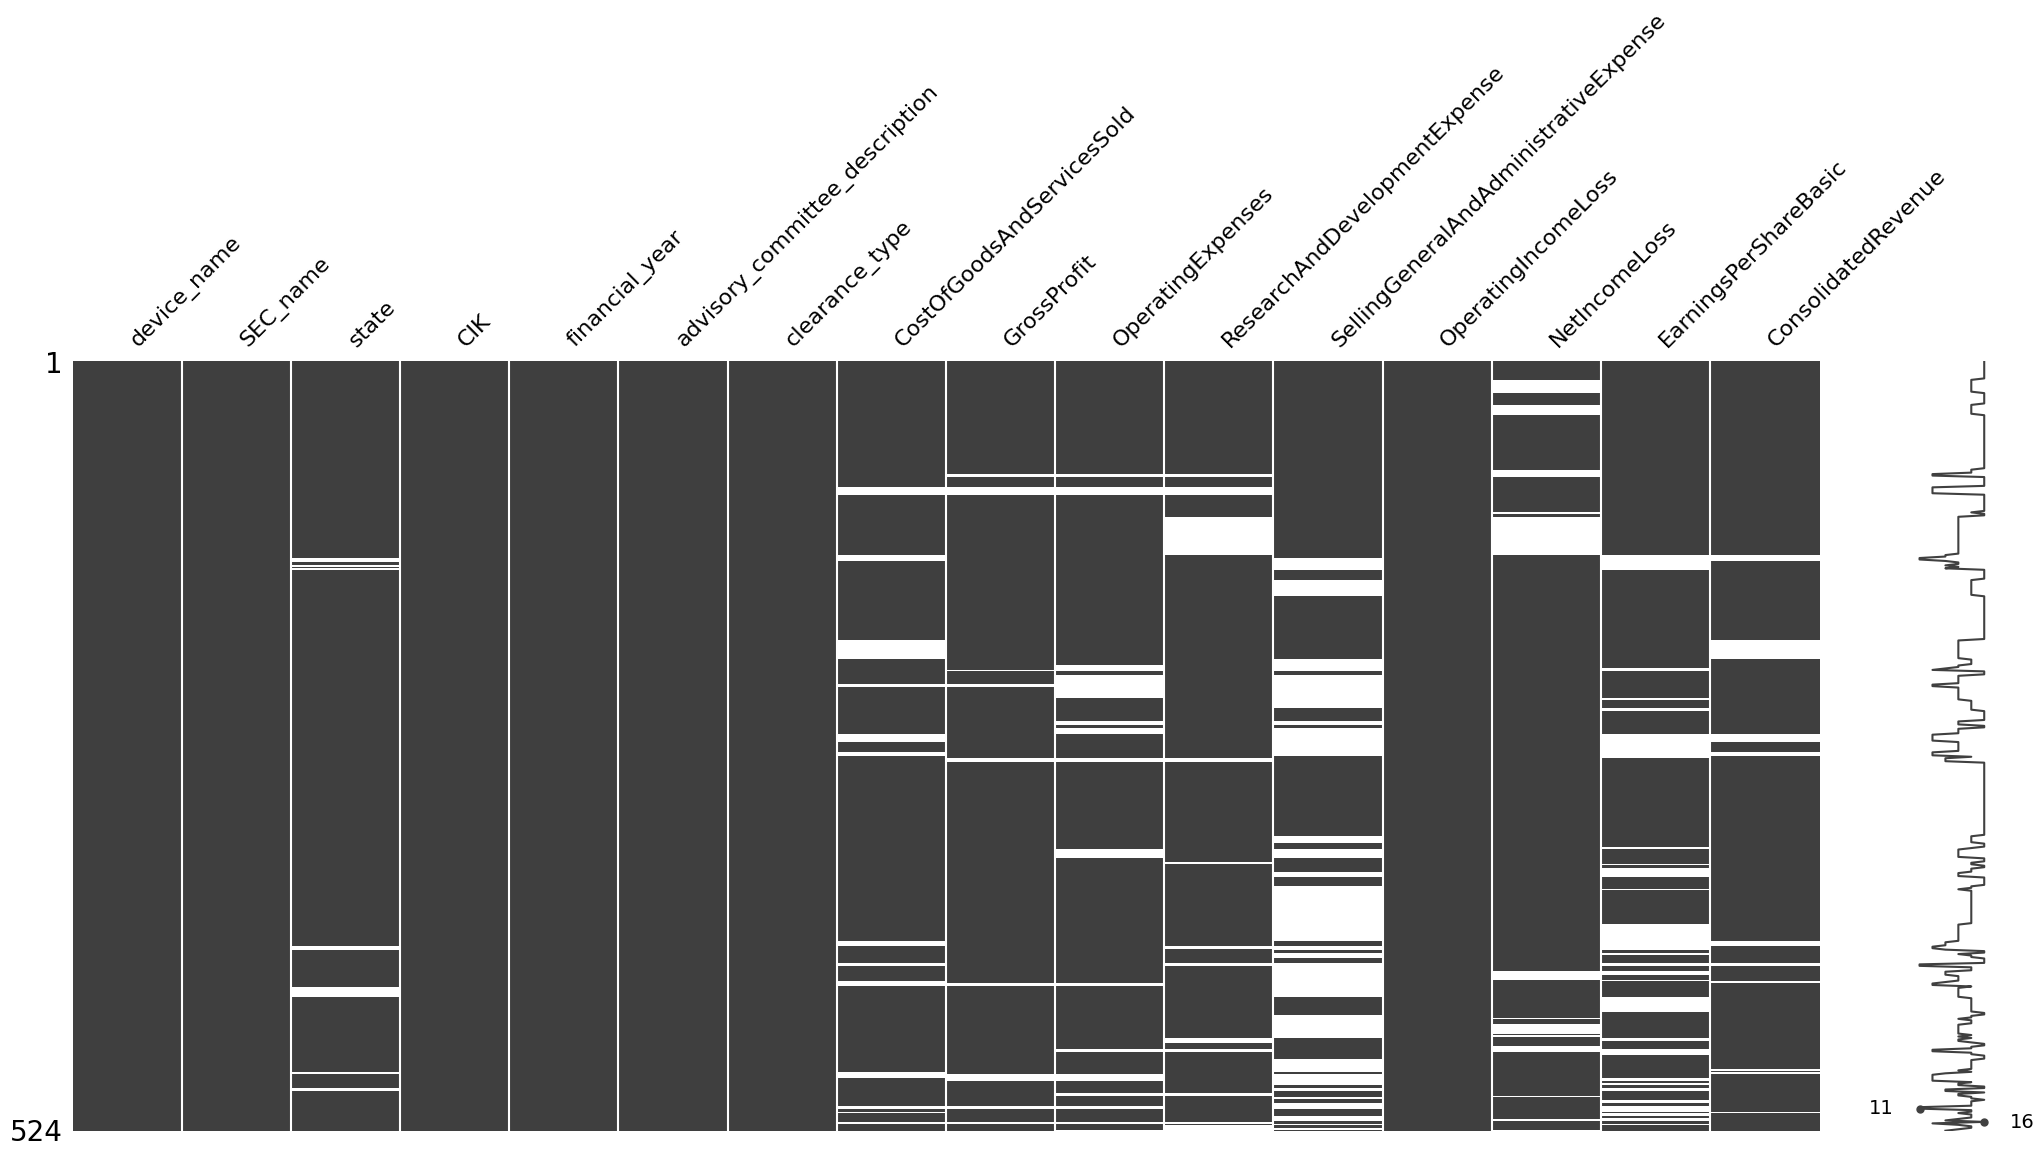

In [105]:
condition = df_analysis['ConsolidatedRevenue'].notnull() & df_analysis['GrossProfit'].notnull()

df_analysis.loc[condition, 'CostOfGoodsAndServicesSold'] = df_analysis.loc[condition, 'CostOfGoodsAndServicesSold'].fillna(
    df_analysis['ConsolidatedRevenue'] - df_analysis['GrossProfit'])

msno.matrix(df_analysis)

## **SG&A = OPEX - R&D**

<Axes: >

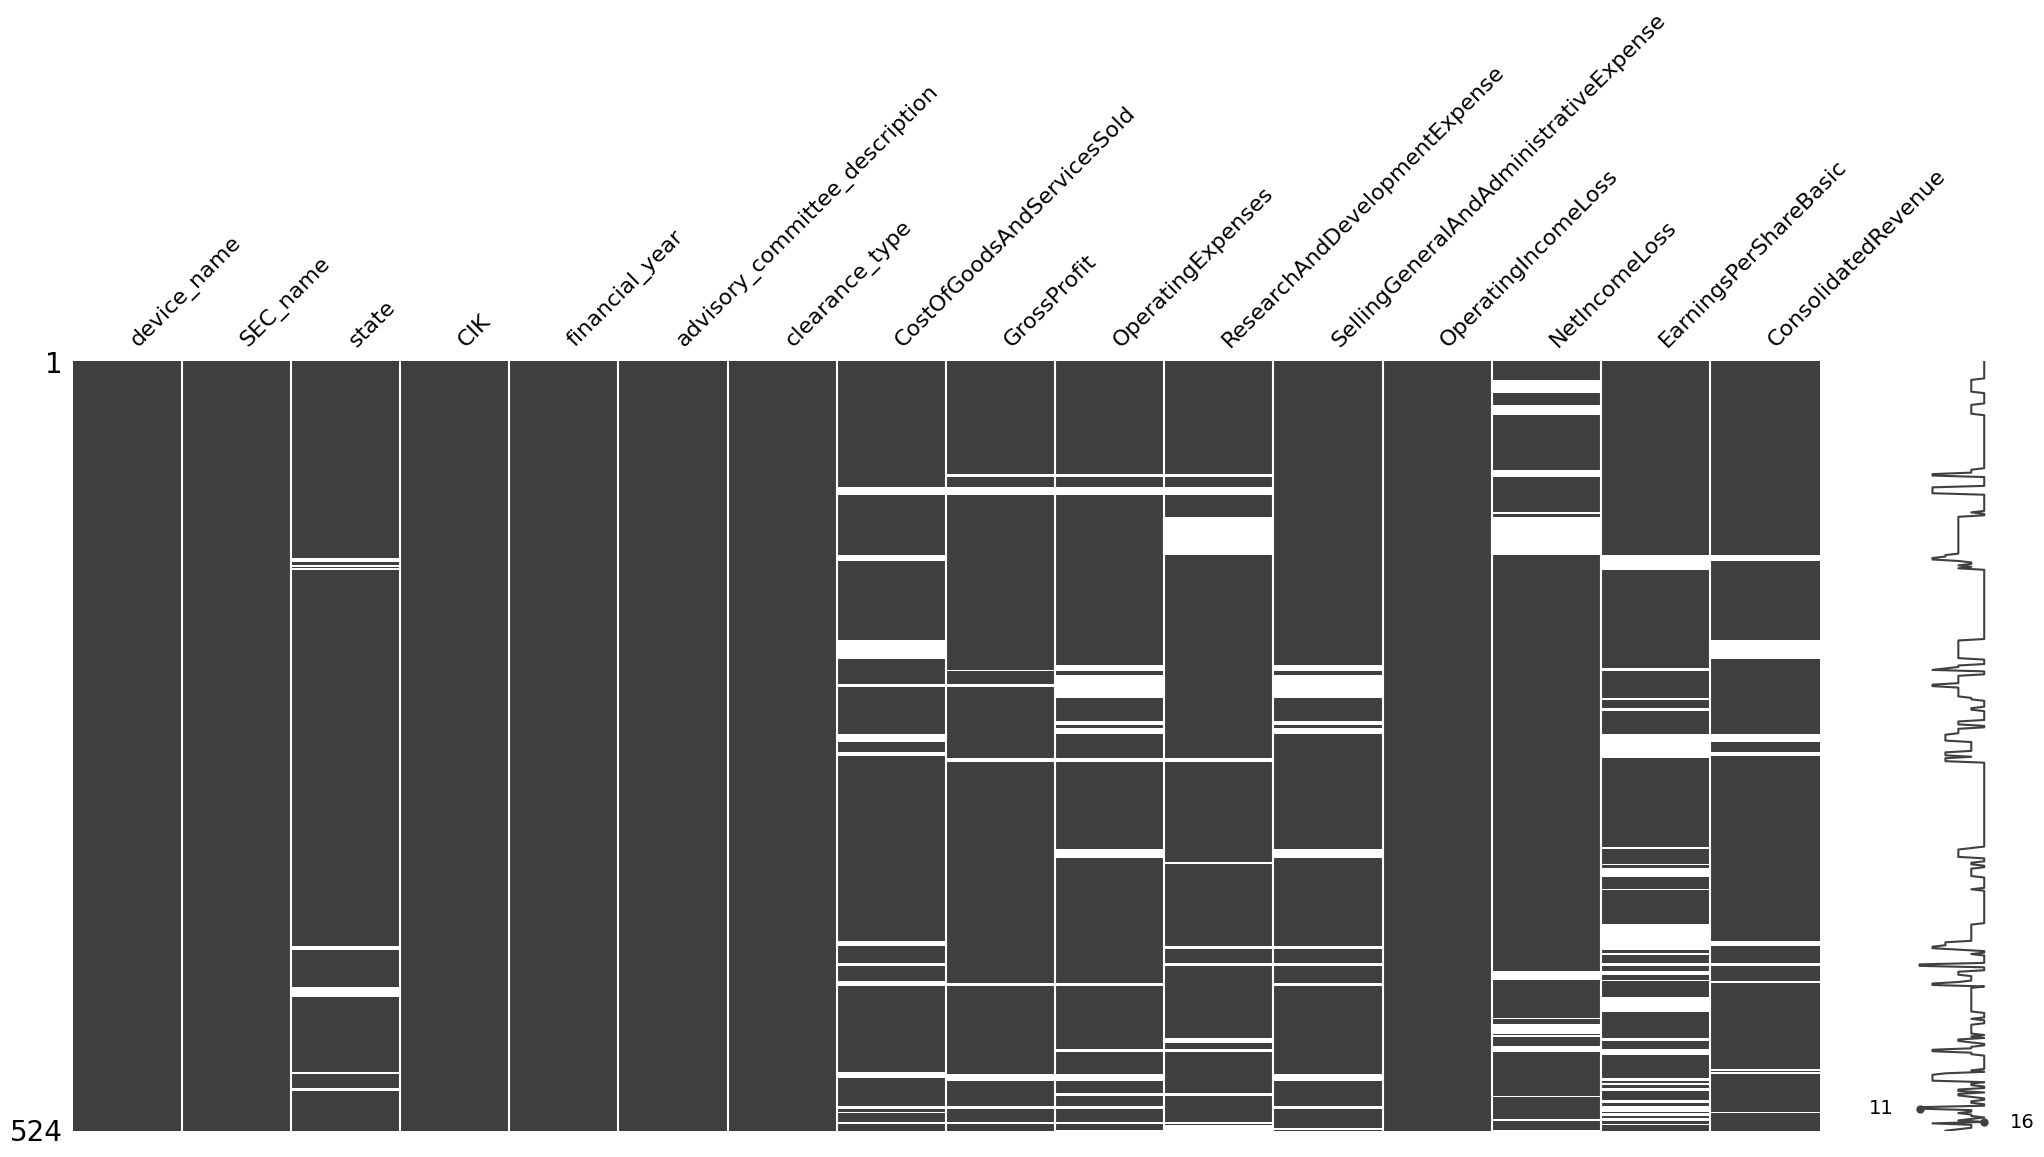

In [106]:
condition = df_analysis['OperatingExpenses'].notnull() & df_analysis['ResearchAndDevelopmentExpense'].notnull()

df_analysis.loc[condition, 'SellingGeneralAndAdministrativeExpense'] = df_analysis.loc[condition, 'SellingGeneralAndAdministrativeExpense'].fillna(
    df_analysis['OperatingExpenses'] - df_analysis['ResearchAndDevelopmentExpense'])

msno.matrix(df_analysis)

## **R&D = OPEX - SG&A**

<Axes: >

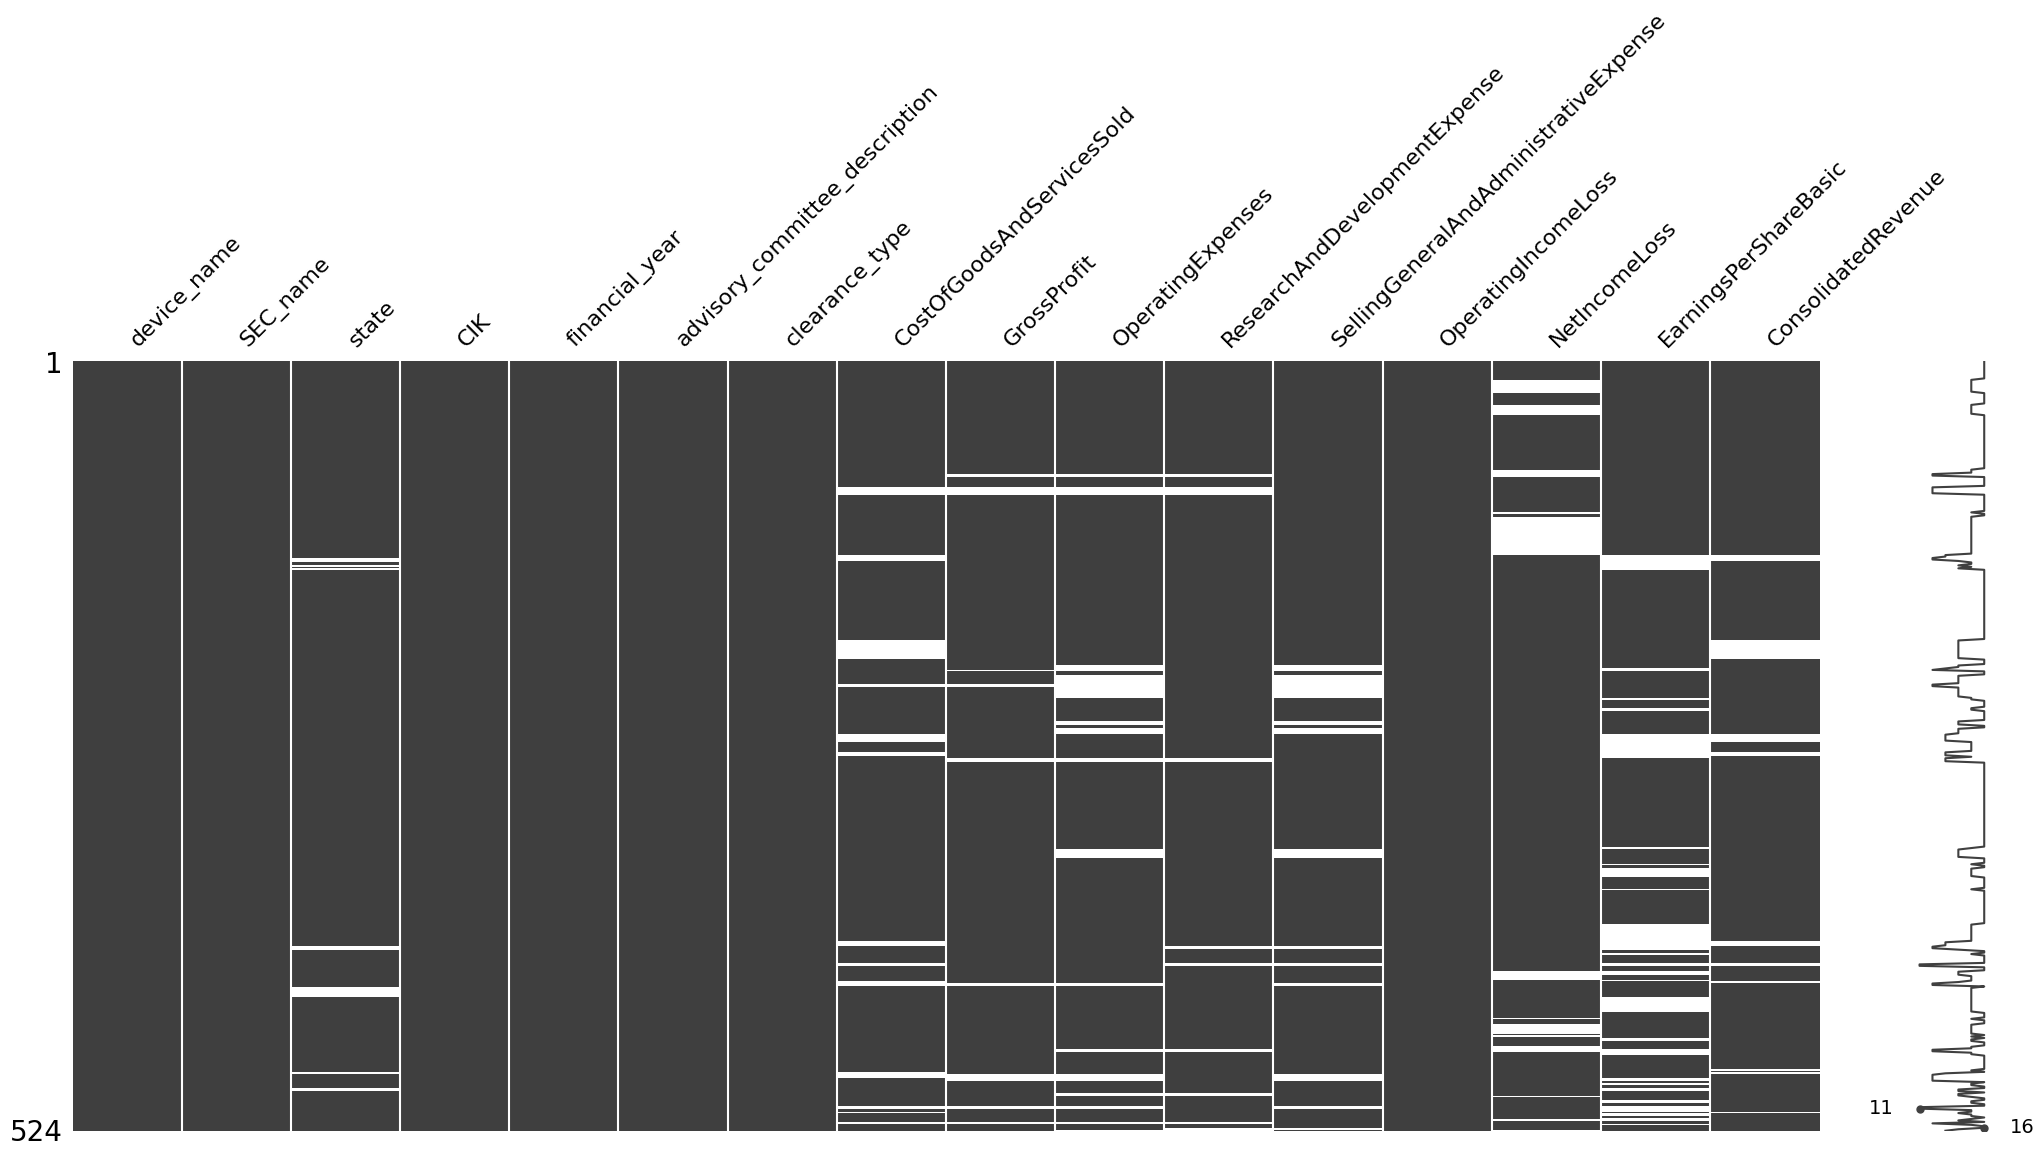

In [107]:
condition = df_analysis['OperatingExpenses'].notnull() & df_analysis['SellingGeneralAndAdministrativeExpense'].notnull()

df_analysis.loc[condition, 'ResearchAndDevelopmentExpense'] = df_analysis.loc[condition, 'ResearchAndDevelopmentExpense'].fillna(
    df_analysis['OperatingExpenses'] - df_analysis['SellingGeneralAndAdministrativeExpense'])

msno.matrix(df_analysis)

In [108]:
import numpy as np

df_balancesheet = df_analysis[df_analysis.columns[7:]]

df_balancesheet.fillna(value=np.nan, inplace=True)

df_balancesheet.to_csv('./outputs/balancesheet.csv', index=False)



/var/folders/pk/h507p0sj5pv9r3h5333yh9vm0000gp/T/ipykernel_7360/88391233.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_balancesheet.fillna(value=np.nan, inplace=True)


## **Imputation via KNNImputer**

<Axes: >

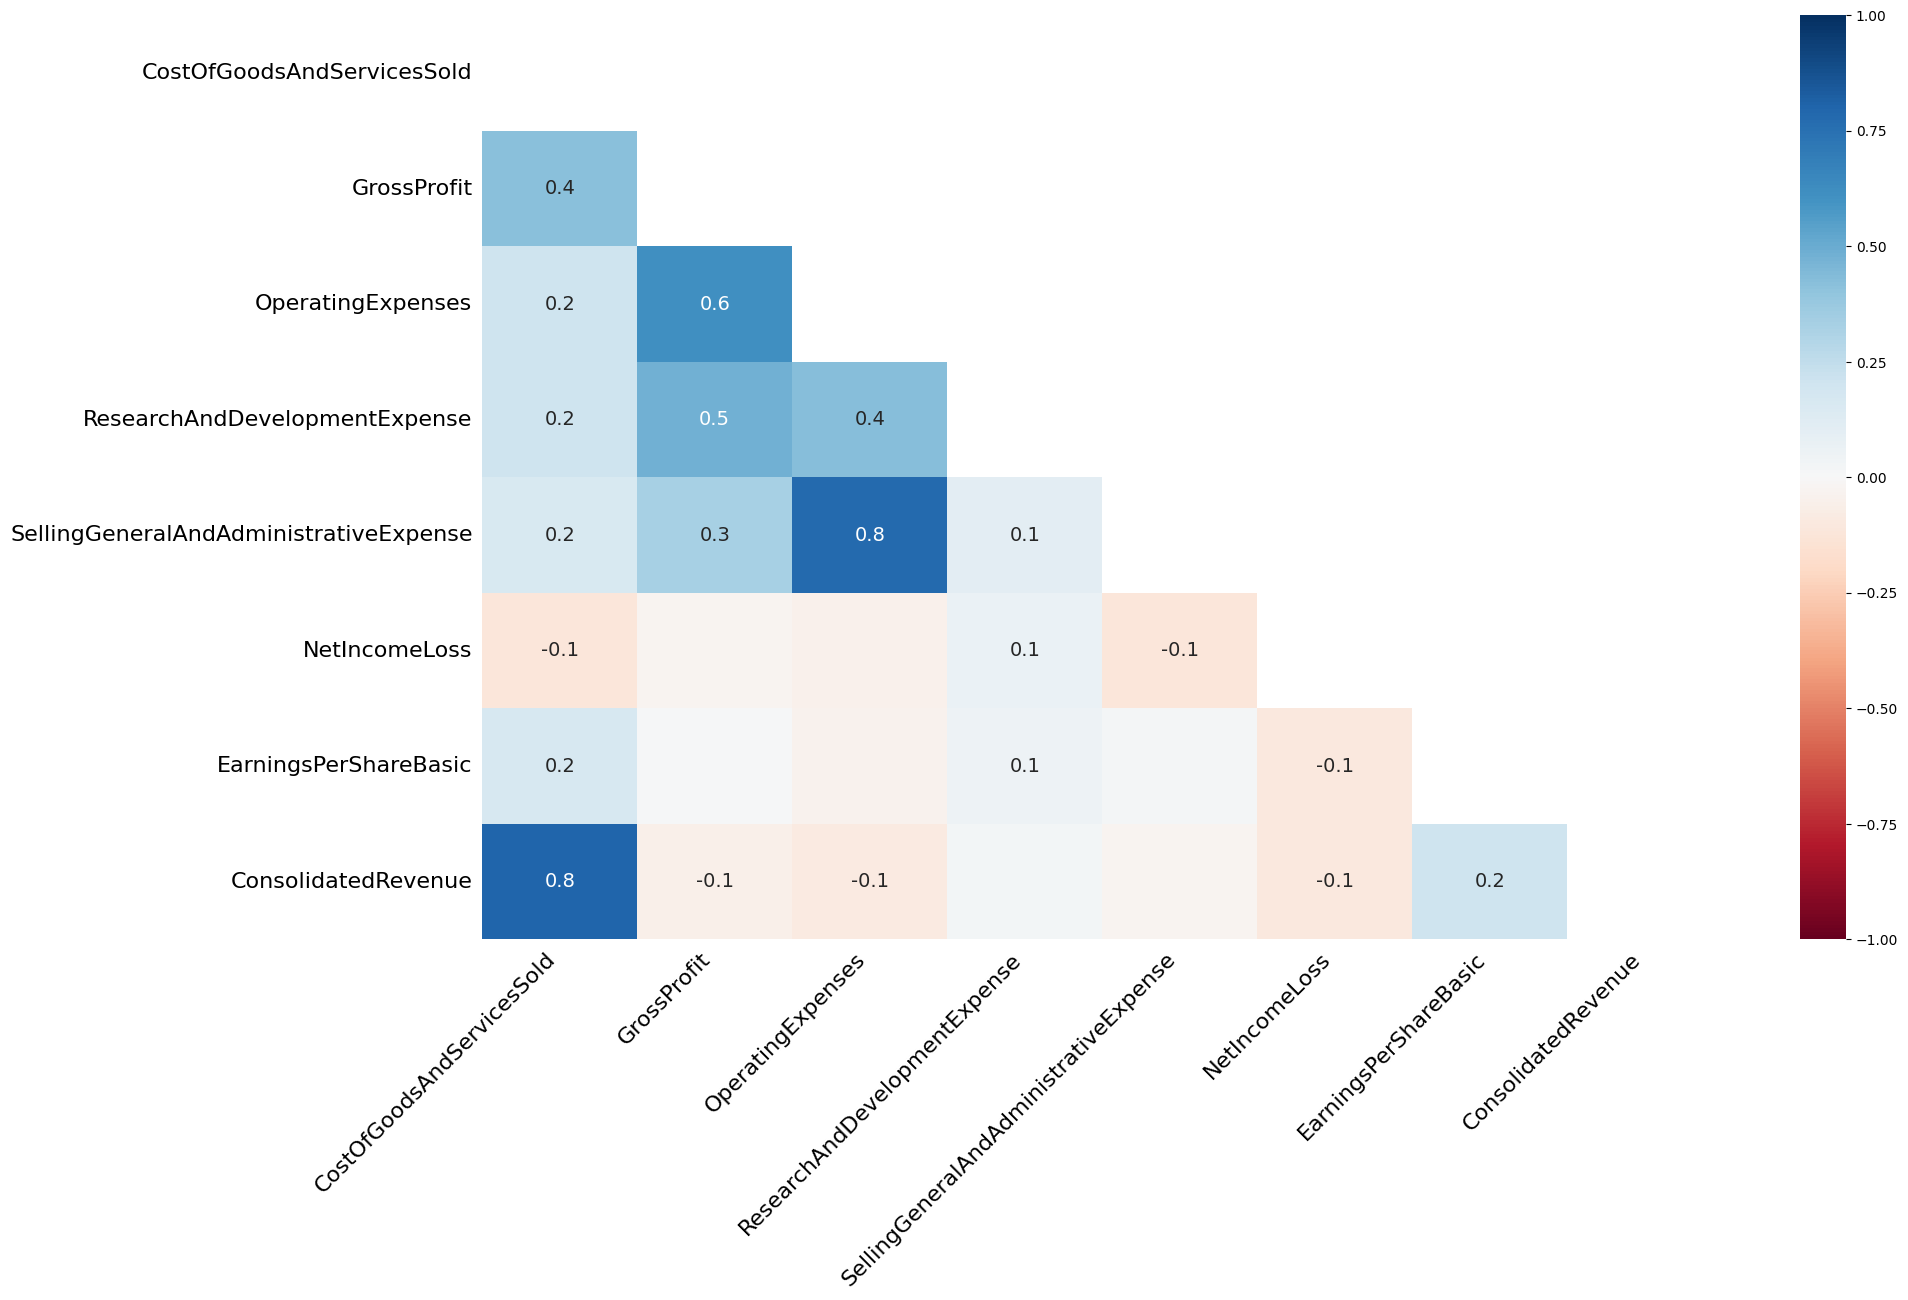

In [109]:
msno.heatmap(df_balancesheet)

In [110]:
# Adapted from https://towardsdatascience.com/advanced-missing-data-imputation-methods-with-sklearn-d9875cbcc6eb
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import seaborn as sns

balancesheet_knn_imputed = df_balancesheet.copy(deep=True)

knn_imp = KNNImputer(n_neighbors=3)

balancesheet_knn_imputed.loc[:, :] = knn_imp.fit_transform(balancesheet_knn_imputed)

In [111]:
balancesheet_knn_imputed

,CostOfGoodsAndServicesSold,GrossProfit,OperatingExpenses,ResearchAndDevelopmentExpense,SellingGeneralAndAdministrativeExpense,OperatingIncomeLoss,NetIncomeLoss,EarningsPerShareBasic,ConsolidatedRevenue
7,1.108570e+08,3.635140e+08,2.324430e+08,31687000.0,1.877980e+08,1.383620e+08,9.248500e+07,0.98,4.743710e+08
8,1.108570e+08,3.635140e+08,2.324430e+08,31687000.0,1.877980e+08,1.383620e+08,9.248500e+07,0.98,4.743710e+08
9,1.108570e+08,3.635140e+08,2.324430e+08,31687000.0,1.877980e+08,1.383620e+08,9.248500e+07,0.98,4.743710e+08
11,1.003430e+08,3.341160e+08,2.324430e+08,27926000.0,1.825180e+08,1.147930e+08,7.383100e+07,0.82,4.344590e+08
12,1.003430e+08,3.341160e+08,2.324430e+08,27926000.0,1.825180e+08,1.147930e+08,7.383100e+07,0.82,4.344590e+08
...,...,...,...,...,...,...,...,...,...
742,2.679300e+07,2.131100e+07,6.947500e+07,13376000.0,5.609900e+07,-4.816400e+07,-5.105900e+07,-11.63,4.810400e+07
743,1.884480e+08,3.719640e+08,3.771170e+08,90049000.0,2.870680e+08,4.750800e+07,4.845800e+07,1.39,5.604120e+08
744,3.119260e+08,5.352070e+08,5.291250e+08,79407000.0,4.497180e+08,-3.894200e+07,-2.463300e+07,-0.66,8.471330e+08
745,7.507810e+08,3.674486e+09,2.893350e+09,557300000.0,1.178400e+09,7.811360e+08,5.393620e+08,1.57,4.425267e+09


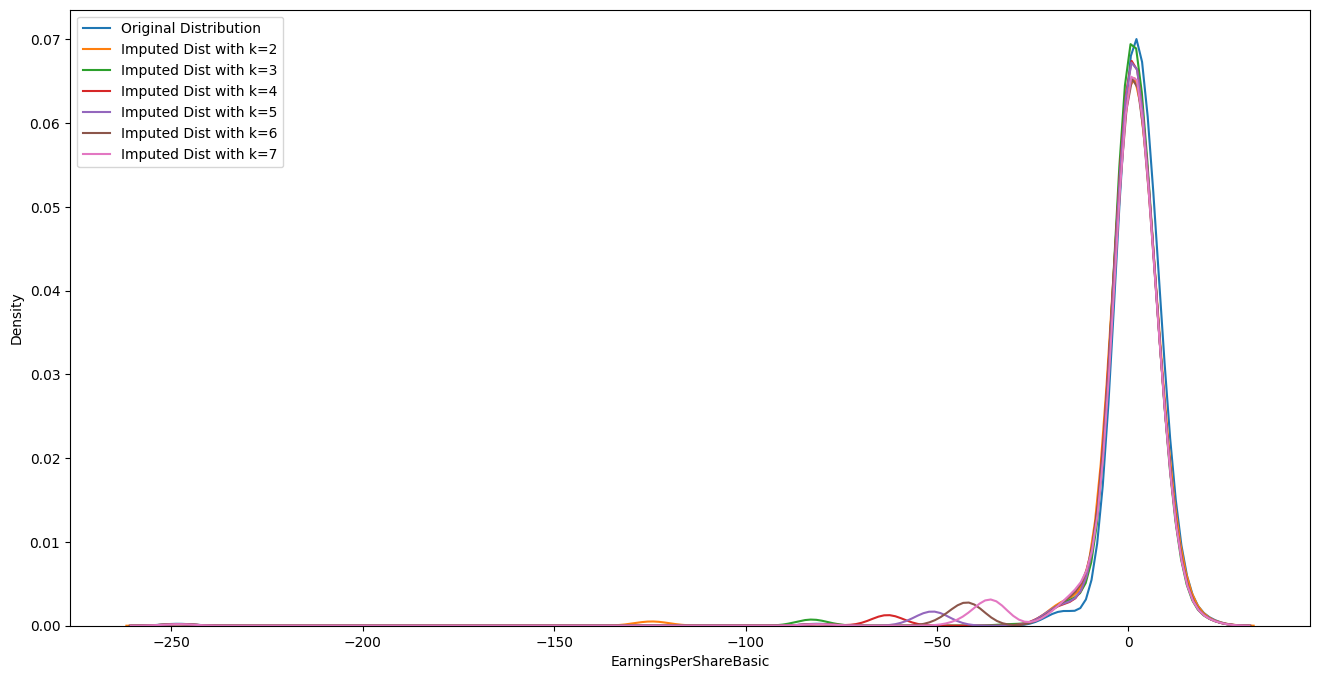

In [112]:
"""

n_neighbors = [2, 3, 4, 5, 6, 7]

fig, ax = plt.subplots(figsize=(16, 8))
# Plot the original distribution
sns.kdeplot(df_balancesheet.EarningsPerShareBasic, label="Original Distribution")
for k in n_neighbors:
    knn_imp = KNNImputer(n_neighbors=k)
    balancesheet_knn_imputed.loc[:, :] = knn_imp.fit_transform(df_balancesheet)
    sns.kdeplot(balancesheet_knn_imputed.EarningsPerShareBasic, label=f"Imputed Dist with k={k}")

plt.legend()

"""

# k = 3 is closest to the original distribution

In [113]:
df_balancesheet.EarningsPerShareBasic.describe()

count    425.000000
mean       1.543765
std       13.656068
min     -248.220000
25%       -0.200000
50%        1.300000
75%        5.720000
max       19.210000
Name: EarningsPerShareBasic, dtype: float64

In [118]:
imputed_df = df_analysis[df_analysis.columns[:7]].merge(balancesheet_knn_imputed, left_index= True, right_index=True)

imputed_df

,device_name,SEC_name,state,CIK,financial_year,advisory_committee_description,clearance_type,CostOfGoodsAndServicesSold,GrossProfit,OperatingExpenses,ResearchAndDevelopmentExpense,SellingGeneralAndAdministrativeExpense,OperatingIncomeLoss,NetIncomeLoss,EarningsPerShareBasic,ConsolidatedRevenue
7,CONFIRM BIOACTIVE,"GLOBUS MEDICAL, INC.",PA,1237831,2014.0,Orthopedic,Traditional,1.108570e+08,3.635140e+08,2.324430e+08,3.168700e+07,1.877980e+08,1.383620e+08,9.248500e+07,0.980000,4.743710e+08
8,SILC FIXATION SYSTEM,"GLOBUS MEDICAL, INC.",PA,1237831,2014.0,Orthopedic,Traditional,1.108570e+08,3.635140e+08,2.324430e+08,3.168700e+07,1.877980e+08,1.383620e+08,9.248500e+07,0.980000,4.743710e+08
9,REVERE STABILIZATION SYSTEM,"GLOBUS MEDICAL, INC.",PA,1237831,2014.0,Orthopedic,Traditional,1.108570e+08,3.635140e+08,2.324430e+08,3.168700e+07,1.877980e+08,1.383620e+08,9.248500e+07,0.980000,4.743710e+08
11,SUSTAIN AND SUSTAIN RADIOLUCENT SPACERS,"GLOBUS MEDICAL, INC.",PA,1237831,2013.0,Orthopedic,Traditional,1.003430e+08,3.341160e+08,2.324430e+08,2.792600e+07,1.825180e+08,1.147930e+08,7.383100e+07,0.820000,4.344590e+08
12,COALITION SPACER,"GLOBUS MEDICAL, INC.",PA,1237831,2013.0,Orthopedic,Traditional,1.003430e+08,3.341160e+08,2.324430e+08,2.792600e+07,1.825180e+08,1.147930e+08,7.383100e+07,0.820000,4.344590e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,Palladium High Flow Therapy System,"Vapotherm, Inc.",NH,1253176,2019.0,Anesthesiology,Traditional,2.679300e+07,2.131100e+07,6.947500e+07,1.337600e+07,5.609900e+07,-4.816400e+07,-5.105900e+07,-7.598571,4.810400e+07
743,"Indigo System Aspiration Catheter 12, Indigo A...","Penumbra, Inc",CA,1321732,2020.0,Cardiovascular,Traditional,1.884480e+08,3.719640e+08,3.771170e+08,9.004900e+07,2.870680e+08,4.750800e+07,4.845800e+07,1.390000,5.604120e+08
744,BENCHMARK BMX81 Access System,"Penumbra, Inc",CA,1321732,2022.0,Cardiovascular,Traditional,3.119260e+08,5.352070e+08,5.291250e+08,7.940700e+07,4.497180e+08,-3.894200e+07,-2.463300e+07,-0.660000,8.471330e+08
745,Cerner CareAware Event Management,CERNER CORPORATION,MO,804753,2015.0,Cardiovascular,Traditional,7.507810e+08,3.674486e+09,2.893350e+09,5.627000e+08,1.183814e+09,7.811360e+08,5.393620e+08,1.570000,4.425267e+09


<Axes: >

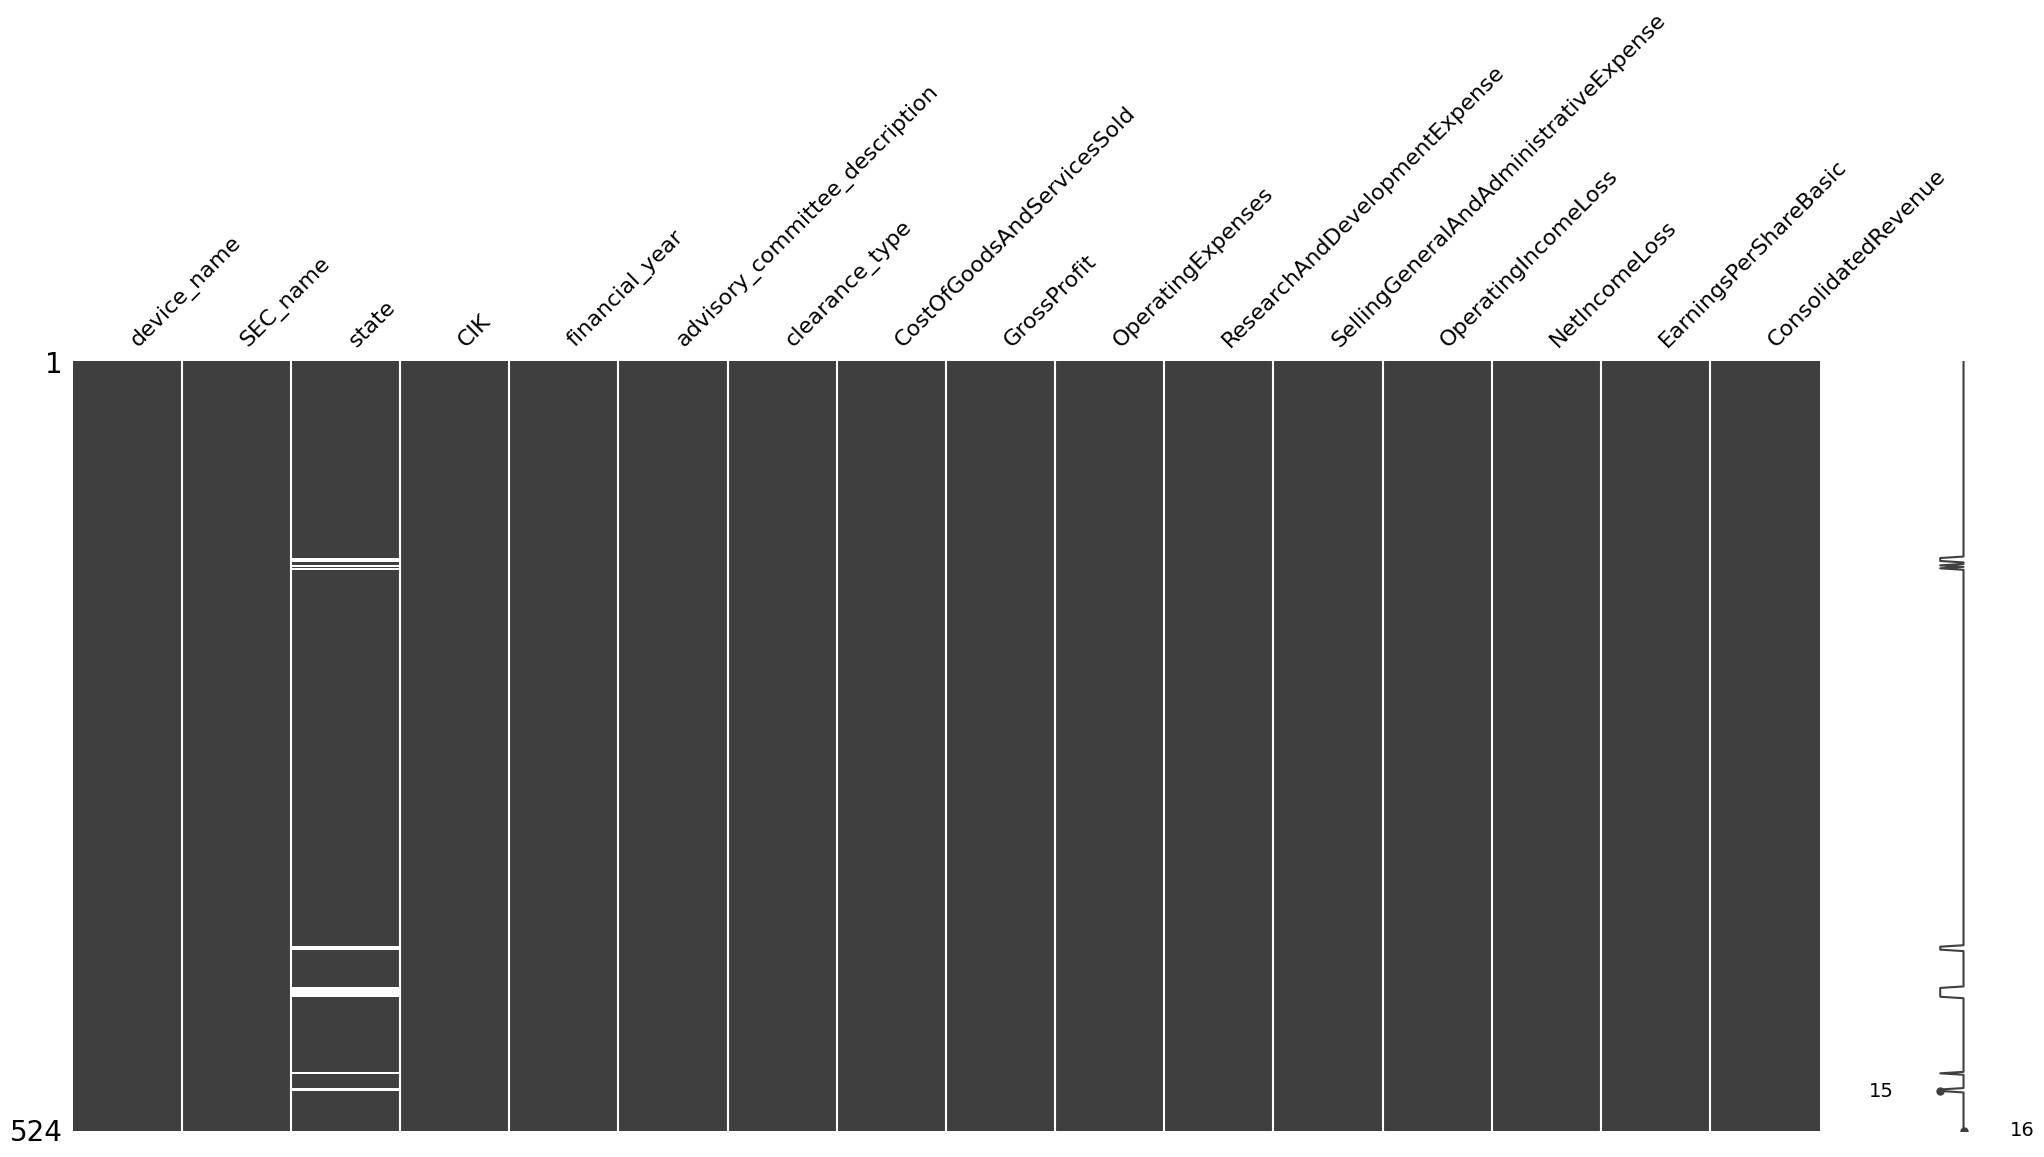

In [119]:
msno.matrix(imputed_df)

In [120]:
imputed_df.to_csv('./outputs/imputed.csv', index=False)